In [66]:
import numpy as np
import pandas as pd

In [67]:
df=pd.read_csv('OnlineNewsPopularity.csv')

In [68]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [69]:
df.shape

(39644, 61)

In [70]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [71]:
df.columns = df.columns.str.lstrip(' ') 
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

From classfication problem perspective making a new column shares_new indicating popular or not popular online news : if there are more than 1400 shares we consider it to be popular else we cosider it to be unpopular.


In [72]:

shares_new=[]
shareslist=list(df['shares'])
for i in shareslist:
    if(i<1400):
        shares_new.append('Unpopular')
    else:shares_new.append('Popular')
        

In [73]:
df['shares_new']=pd.Series(shares_new)

In [21]:
df.head()  #we now have two columns - 'shares' as continuous for regression and 'shares_new' for classification

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_new
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


# Let's do exploratory data analysis of each column :-

In [261]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

# Timedelta 

In [12]:
df.timedelta.value_counts()

91.0     104
72.0     102
84.0     101
59.0      99
29.0      99
210.0     97
182.0     96
28.0      95
37.0      95
127.0     94
161.0     94
52.0      94
77.0      93
79.0      93
35.0      93
23.0      93
100.0     92
36.0      92
66.0      92
92.0      92
71.0      91
49.0      90
135.0     90
169.0     90
126.0     90
121.0     90
260.0     89
64.0      89
50.0      89
729.0     89
        ... 
522.0     19
481.0     19
256.0     19
243.0     19
145.0     19
495.0     19
432.0     19
677.0     19
264.0     19
383.0     19
557.0     19
621.0     19
691.0     18
404.0     18
299.0     18
508.0     18
494.0     18
684.0     18
585.0     18
705.0     17
719.0     17
571.0     17
369.0     17
635.0     16
291.0     16
375.0     15
656.0     15
376.0     15
730.0     12
8.0        8
Name: timedelta, Length: 724, dtype: int64

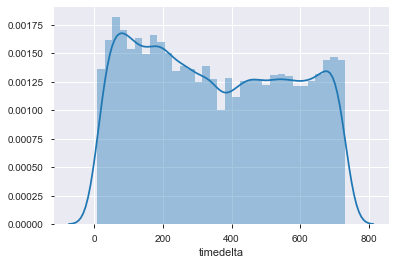

In [39]:
sns.distplot(df['timedelta'])

Timedelta does not follow normal distribution or any pattern at all!
It cannot be inferred to be left or right skewed - its skewness is negligible.

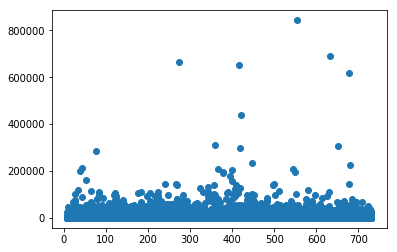

In [14]:
plt.scatter(x='timedelta',y='shares',data=df)

Timedelta and shares show a little pattern : as timedelta increases shares increase.

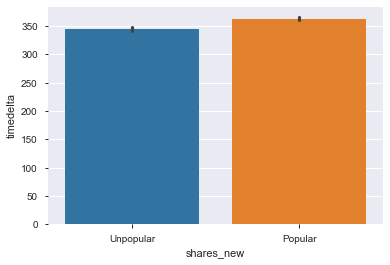

In [263]:
sns.barplot(x='shares_new',y='timedelta',data=df)

Both popular and unpopular values follow almost same pattern with respect to timedelta.

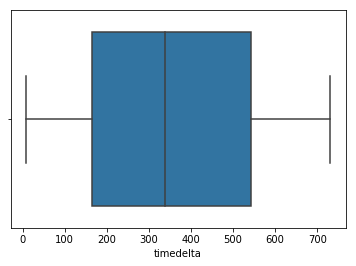

In [16]:
sns.boxplot(df['timedelta'])

There are no outliers .

# n_tokens_title

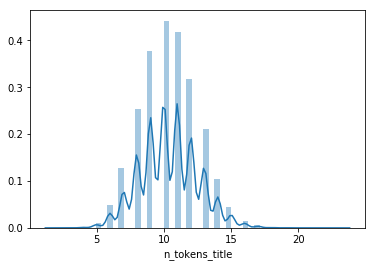

In [17]:
sns.distplot(df['n_tokens_title'])

In [18]:
df['n_tokens_title'].describe()

count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

As we see n_tokens_title does not follow normal distribution but follows skewness on either ends equally. We can infer that no of words in title is 23 words maximum and 2 words minimum. The average number of words is 10.

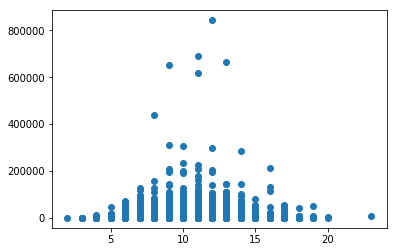

In [19]:
plt.scatter(x='n_tokens_title',y='shares',data=df)

As we see from the above , maximum shares is for number of words around 12.

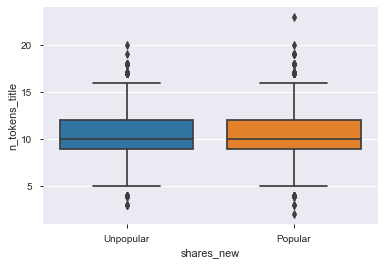

In [264]:
sns.boxplot(x='shares_new',y='n_tokens_title',data=df)

As seen above, popular news have more outliers on either ends with respect to the number of words.

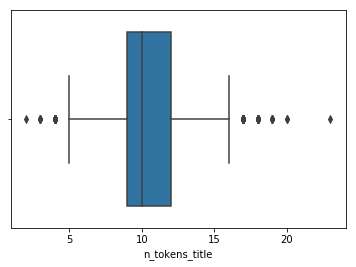

In [21]:
sns.boxplot(df['n_tokens_title'])

There are many outliers and lies on both ends of the lower and upper quartile range.

In [22]:
df['n_tokens_title'].describe()

count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

In [23]:
lower_quartile=9-1.5*(12-9)
upper_quartile=12+1.5*(12-9)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 4.5
 The upper quartile is 16.5


# n_tokens_content

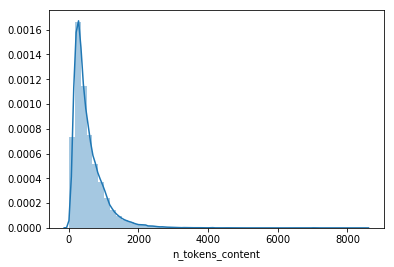

In [24]:
sns.distplot(df['n_tokens_content'])

The data is not normal but right skewed or no of words in the content is increasing towards a higher value (as is logical)


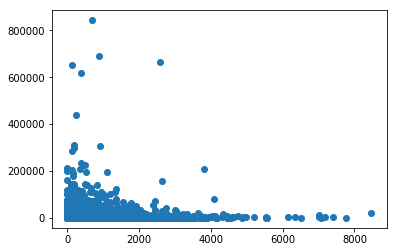

In [25]:
plt.scatter(x='n_tokens_content',y='shares',data=df)

As we see maximum shares is for around 1000 words content. The shares is decreasing as the number of words of content increases.

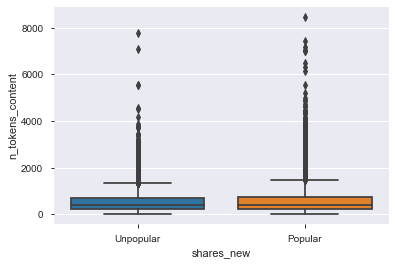

In [265]:
sns.boxplot(x='shares_new',y='n_tokens_content',data=df)

As we see, there are more outliers for popular news! The mean and median is almost same.

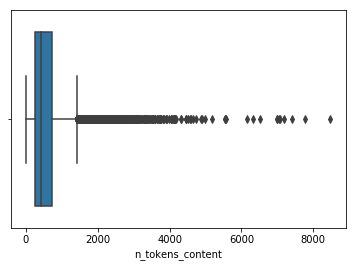

In [27]:
sns.boxplot(df['n_tokens_content'])

There are a lot of outliers as it is heavily right skewed.

In [28]:
df['n_tokens_content'].describe()

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

As is observed the maximum number of words in content is 8474 and the minimum number of words is 0.
The average number of words is 546 which is why the data is heavily right skewed as the maximum is 8474!

In [29]:
lower_quartile=246-1.5*(716-246)
upper_quartile=716+1.5*(716-246)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -459.0
 The upper quartile is 1421.0


# n_unique_tokens

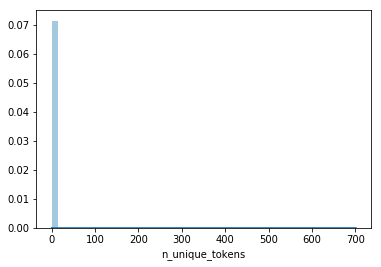

In [30]:
sns.distplot(df['n_unique_tokens'])

The rate of unique words in the content is heavily right skewed! - The maximum value is around 700 as is visible above!

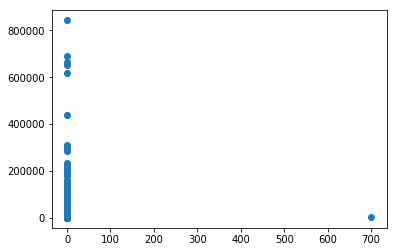

In [31]:
plt.scatter(x='n_unique_tokens',y='shares',data=df)

No visible relationship between shares and number of unique words!

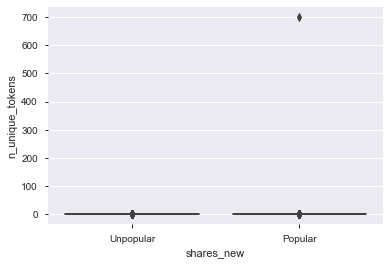

In [266]:
sns.boxplot(x='shares_new',y='n_unique_tokens',data=df)


As we see popular news has one outlier!

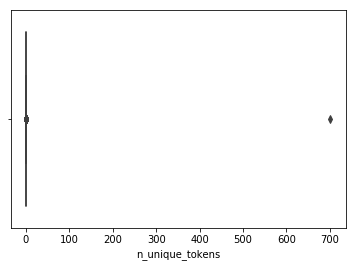

In [34]:
sns.boxplot(df['n_unique_tokens'])

In [35]:
df['n_unique_tokens'].describe()

count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64

As is observed above all the values are lying between 0 and 1 with only one value at 701, the outlier!

In [36]:
lower_quartile=0.47-1.5*(0.6-.47)
upper_quartile=.6+1.5*(0.6-.47)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 0.27499999999999997
 The upper quartile is 0.7949999999999999


# n_non_stop_words

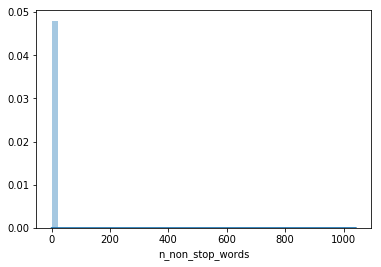

In [37]:
sns.distplot(df['n_non_stop_words'])

As observed the rate of unique non stop words is heavily right skewed.

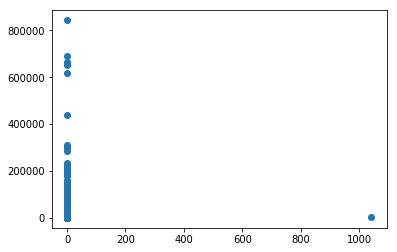

In [38]:
plt.scatter(x='n_non_stop_words',y='shares',data=df)

No visible relationship between shares and number of unique non stop words!

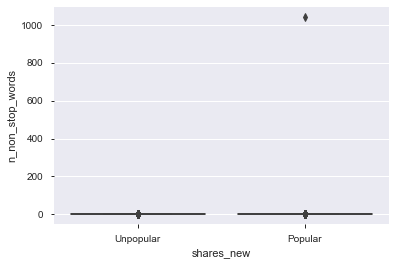

In [267]:
sns.boxplot(x='shares_new',y='n_non_stop_words',data=df)

As we see there's one outlier for popular news!

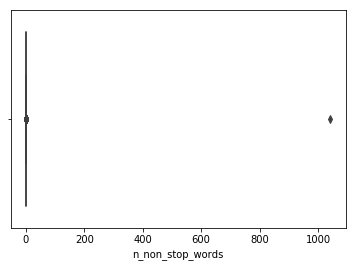

In [40]:
sns.boxplot(df['n_non_stop_words'])

As observed there is one outlier and all other values are close to zero.

In [41]:
df['n_non_stop_words'].describe()

count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

In [42]:
lower_quartile=1-1.5*(1-1)
upper_quartile=1+1.5*(1-1)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 1.0
 The upper quartile is 1.0


# n_non_stop_unique_tokens

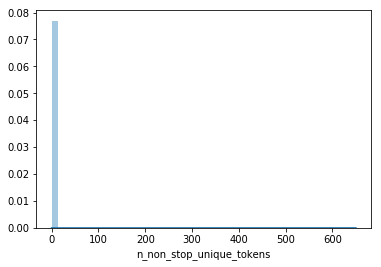

In [43]:
sns.distplot(df['n_non_stop_unique_tokens'])

All the values are concentrating around zero with just one value at around 650 that makes it heavily right skewed.

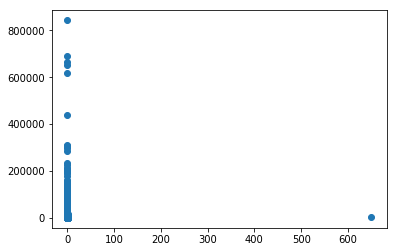

In [44]:
plt.scatter(x='n_non_stop_unique_tokens',y='shares',data=df)

The shares show no pattern with rate of unique non stop words in the content.

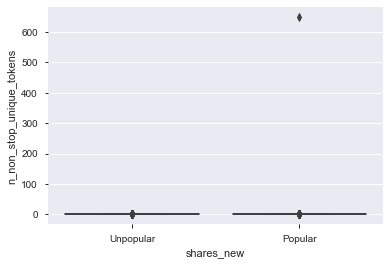

In [268]:
sns.boxplot(x='shares_new',y='n_non_stop_unique_tokens',data=df)

As we see there's one visible outlier for popular news!

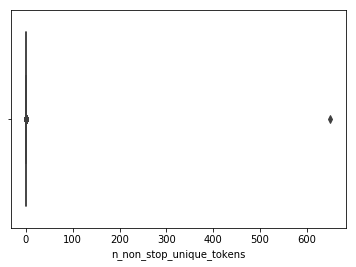

In [46]:
sns.boxplot(df['n_non_stop_unique_tokens'])

In [47]:
df['n_non_stop_unique_tokens'].describe()

count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

As observed there is one visible outlier around 650, all other values are around 0.

In [48]:
lower_quartile=.62-1.5*(.75-.62)
upper_quartile=.75+1.5*(.75-.62)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 0.425
 The upper quartile is 0.9450000000000001


# num_hrefs

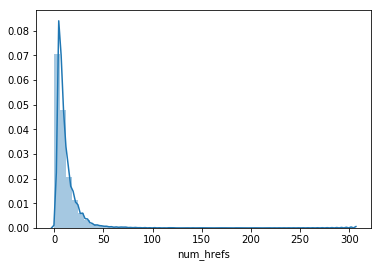

In [49]:
sns.distplot(df['num_hrefs'])

The number of links is heavily right skewed.

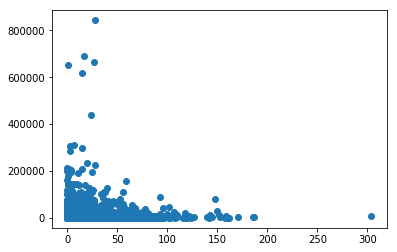

In [50]:
plt.scatter(x='num_hrefs',y='shares',data=df)

The shares are highest for around 40-50 links as seen above. There is no absolute pattern between shares and links.

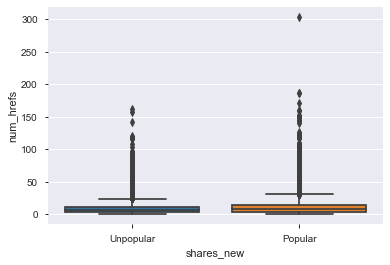

In [269]:
sns.boxplot(x='shares_new',y='num_hrefs',data=df)

As we see there are more outliers for popular news with respect to the number of links. The mean and range of the values for popular and unpopular news are almost similar.

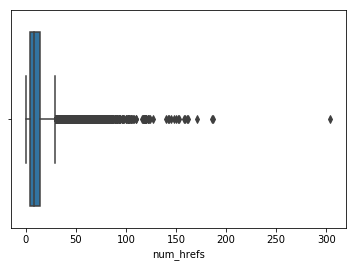

In [52]:
sns.boxplot(df['num_hrefs'])

As observed above , the number of links have heavy outliers beyond upper quartile and thus it is right skewed.
Let us proceed to see the outlier values.

In [53]:
df['num_hrefs'].describe()

count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64

In [54]:
lower_quartile=4-1.5*(14-4)
upper_quartile=14+1.5*(14-4)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -11.0
 The upper quartile is 29.0


As observed the mean number of links is 10 while the maximum value is 304 which makes the number of links heavily right skewed.

# num_self_hrefs

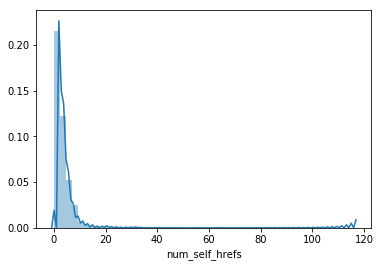

In [55]:
sns.distplot(df['num_self_hrefs'])

As observed the number of links to other articles published by mashable follows heavy right skewness.

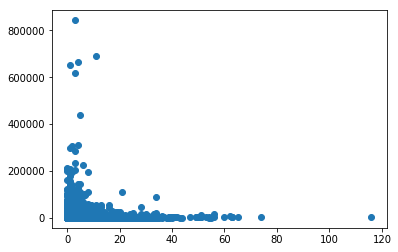

In [56]:
plt.scatter(x='num_self_hrefs',y='shares',data=df)

As observed, the shares is highest between 0-10 number of links to other articles as published by mashable!

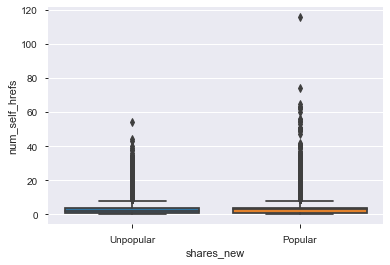

In [270]:
sns.boxplot(x='shares_new',y='num_self_hrefs',data=df)

As observed the number of links to other articles have more outliers for popular news!

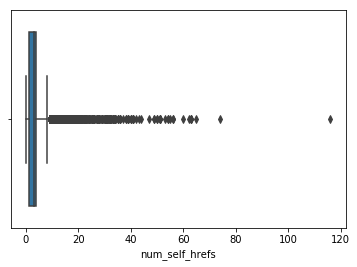

In [58]:
sns.boxplot(df['num_self_hrefs'])

As observed there are heavy outliers beyond upper quartile as seen from the boxplot!

In [59]:
df['num_self_hrefs'].describe()

count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64

In [60]:
lower_quartile=1-1.5*(4-1)
upper_quartile=4+1.5*(4-1)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -3.5
 The upper quartile is 8.5


As observed there is one maximum value at 116 that makes it right skewed.

# num_imgs

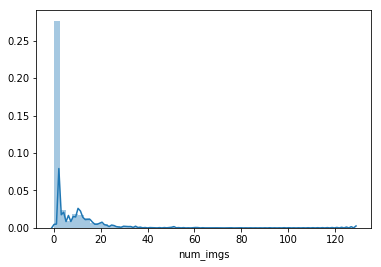

In [61]:
sns.distplot(df['num_imgs'])

As observed , the number of images is right skewed i.e most of the news have images!

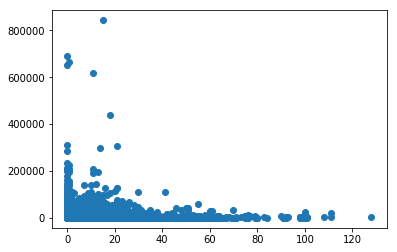

In [62]:
plt.scatter(x='num_imgs',y='shares',data=df)

As observed the maximum shares is of news with around 20 images! We can say that with increase in number of images , shares decreases!

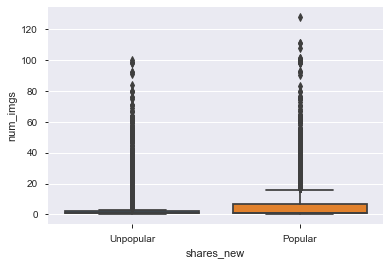

In [271]:
sns.boxplot(x='shares_new',y='num_imgs',data=df)

As observed , the popular news have wider range and spread and more outliers with respect to the number of images in news article.

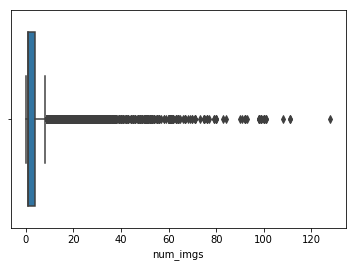

In [64]:
sns.boxplot(df['num_imgs'])

As seen , the number of outliers is heavily existing beyond the upper quartile i.e the number of images increases from the mean or median.

In [65]:
df['num_imgs'].describe()

count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

The average number of images is 4 while the maximum number of images is 128!

In [66]:
lower_quartile=0-1.5*(4-1)
upper_quartile=4+1.5*(4-1)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -4.5
 The upper quartile is 8.5


# num_videos

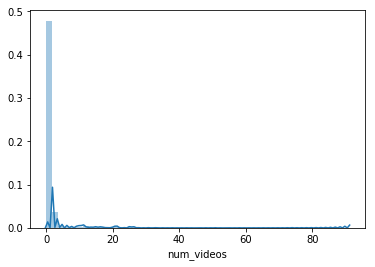

In [67]:
sns.distplot(df['num_videos'])

The number of videos in our news data follows right skewness! i.e the distribution is beyond upper quartile of number of videos!

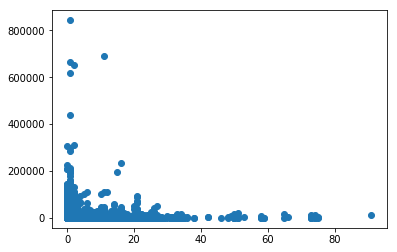

In [68]:
plt.scatter(x='num_videos',y='shares',data=df)

As observed the shares is maximum for 0 or no videos and gradually decreases with increase in number of videos!

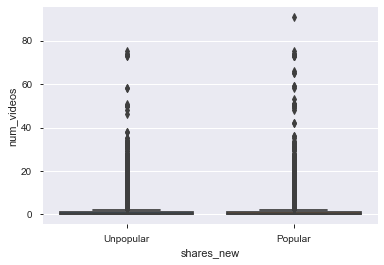

In [272]:
sns.boxplot(x='shares_new',y='num_videos',data=df)

As observed the distribution of both popular and unpopular news is almost similar with respect to the number of videos in news article.

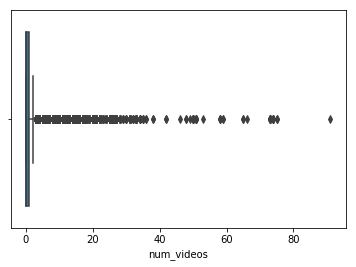

In [70]:
sns.boxplot(df['num_videos'])

As observed the number of videos is heavily right skewed and has a lot of outliers!

In [71]:
df['num_videos'].describe()

count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

In [72]:
lower_quartile=0-1.5*(1-0)
upper_quartile=1+1.5*(1-0)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -1.5
 The upper quartile is 2.5


As observed the maximum number of videos is 91. However most news have just 1 video.

# average_token_length

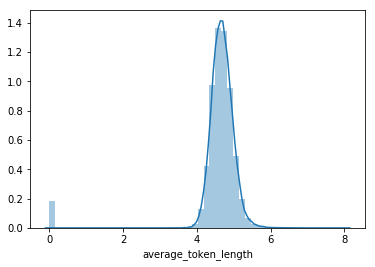

In [73]:
sns.distplot(df['average_token_length'])

As seen the average length of the words in the content follows normal distribution with skewness on both edges of lower and upper quartile!

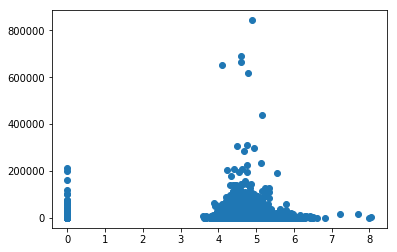

In [74]:
plt.scatter(x='average_token_length',y='shares',data=df)

As observed the shares is maximum for 5 being the average length of the words in the content.
For 7-8 words the shares is the lowest for sure.

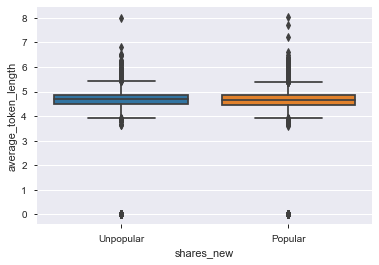

In [273]:
sns.boxplot(x='shares_new',y='average_token_length',data=df)

As observed the average token length lies between 4 and 5 approximately for all news.

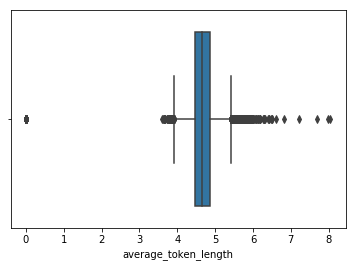

In [76]:
sns.boxplot(df['average_token_length'])

The average token length is between 4.5 and 5. There are outliers mostly beyond the upper quartile.

In [77]:
df['average_token_length'].describe()

count    39644.000000
mean         4.548239
std          0.844406
min          0.000000
25%          4.478404
50%          4.664082
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64

The maximum average token length or the maximum average length of words in news is 8 while the minimum is 0 and the average is 4.

In [78]:
lower_quartile=4.47-1.5*(4.85-4.47)
upper_quartile=4.85+1.5*(4.85-4.47)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 3.9
 The upper quartile is 5.42


# num_keywords

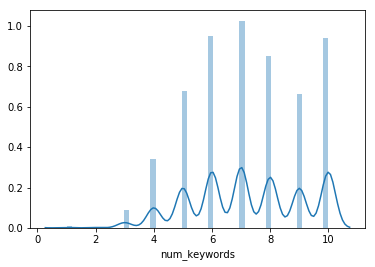

In [79]:
sns.distplot(df['num_keywords'])

The number of keywords in the metadata is not at all normal and follows left skewness heavily. In other words outliers are mostly beyond first quartile.

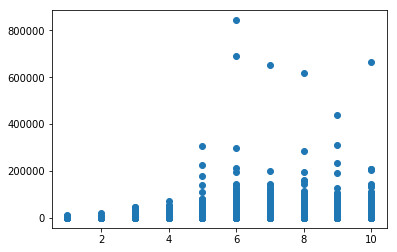

In [80]:
plt.scatter(x='num_keywords',y='shares',data=df)

As seen the maximum shares is with 6 keywords in the metadata.

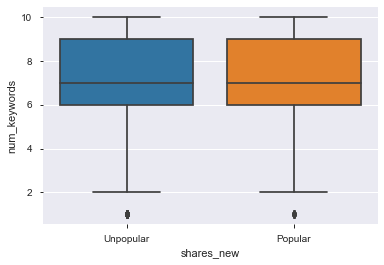

In [274]:
sns.boxplot(x='shares_new',y='num_keywords',data=df)

As observed , for all news the number of keywords follow similar range, mean and median values.

# kw_min_min

In [82]:
# kw_min_min

df.kw_min_min.value_counts()

-1.0      22980
 4.0      11908
 217.0     4636
 0.0         79
 47.0         6
 57.0         5
 86.0         4
 82.0         3
 63.0         2
 45.0         2
 129.0        2
 294.0        2
 88.0         2
 98.0         1
 162.0        1
 65.0         1
 184.0        1
 80.0         1
 318.0        1
 138.0        1
 201.0        1
 97.0         1
 377.0        1
 42.0         1
 41.0         1
 116.0        1
Name: kw_min_min, dtype: int64

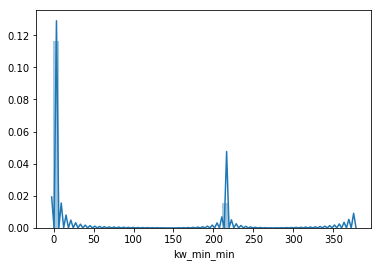

In [83]:
sns.distplot(df.kw_min_min)

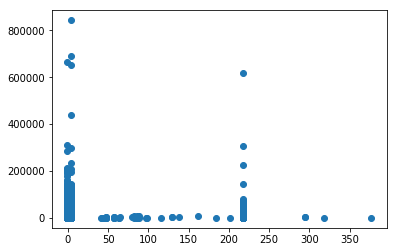

In [84]:
plt.scatter(x='kw_min_min',y='shares',data=df)

No visible relationship between shares and number of unique words!

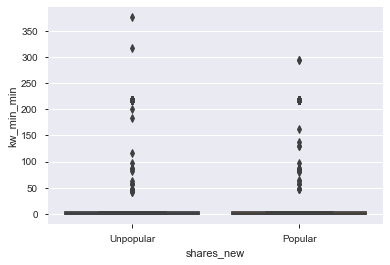

In [275]:
sns.boxplot(x='shares_new',y='kw_min_min',data=df)

As we see, there are more outliers for unpopular news.

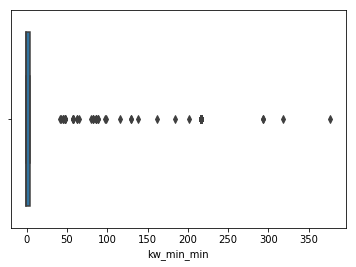

In [86]:
sns.boxplot(df['kw_min_min'])


There are a lot of outliers as it is heavily right skewed.


In [87]:
df['kw_min_min'].describe()


count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

In [88]:
lower_quartile= -1.00-1.5*(4 - (-1.0))
upper_quartile= 4+1.5*(4 - (-1.0))
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -8.5
 The upper quartile is 11.5


# kw_max_min


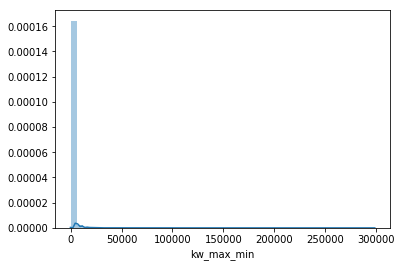

In [89]:
sns.distplot(df.kw_max_min)


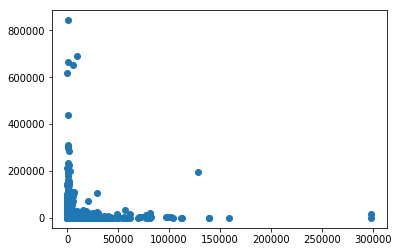

In [90]:

plt.scatter(x='kw_max_min',y='shares',data=df)

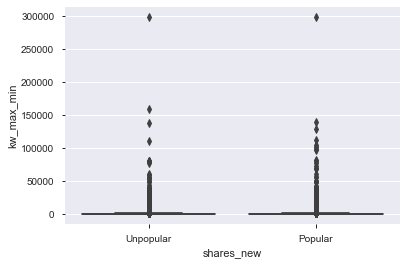

In [276]:

sns.boxplot(x='shares_new',y='kw_max_min',data=df)


As we see, the outliers are almost same for both popular and unpopular news wrt kw_max_min.

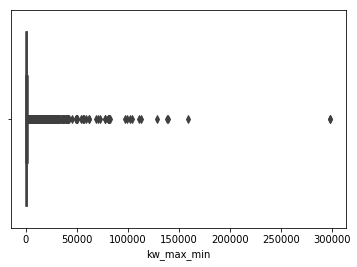

In [92]:
sns.boxplot(df['kw_max_min'])


In [93]:
df['kw_max_min'].describe()


count     39644.000000
mean       1153.951682
std        3857.990877
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64

In [94]:

lower_quartile= 445 -1.5*(1000 - 445)
upper_quartile= 1000 + 1.5*(1000 - 445)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)


 The lower quartile is -387.5
 The upper quartile is 1832.5


# kw_avg_min


In [95]:
df.kw_avg_min.value_counts()


-1.000000       694
 0.000000        81
 43.250000       48
 125.000000      45
 107.666667      44
 80.500000       43
 194.000000      42
 11.500000       39
 282.000000      37
 63.000000       37
 103.000000      34
 143.000000      33
 82.000000       32
 101.400000      32
 15.666667       30
 135.000000      30
 38.250000       28
 133.000000      28
 113.000000      28
 21.000000       27
 161.000000      26
 28.666667       26
 301.000000      26
-0.482000        26
 4.000000        25
 84.000000       25
 203.000000      24
 101.000000      24
 292.000000      24
 188.000000      24
               ... 
 151.236000       1
 459.843333       1
 99.250000        1
 185.098333       1
 57.714286        1
 168.959000       1
 723.833333       1
 841.833333       1
 1121.750000      1
 136.750000       1
 469.510000       1
 965.500000       1
 168.125000       1
 235.897500       1
 124.888889       1
 578.000000       1
 696.200000       1
 309.166667       1
 337.444444       1


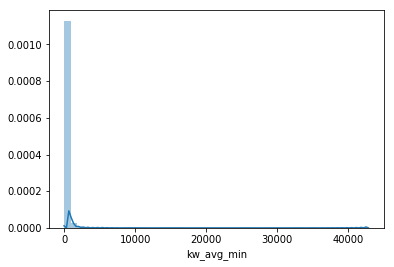

In [96]:
sns.distplot(df.kw_avg_min)


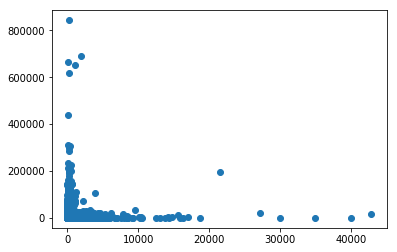

In [97]:
plt.scatter(x='kw_avg_min',y='shares',data=df)


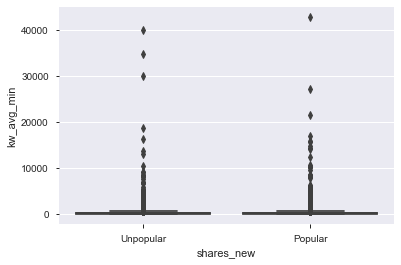

In [277]:
sns.boxplot(x='shares_new',y='kw_avg_min',data=df)


As we see, there are more outliers for popular news!


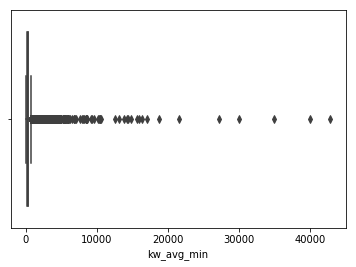

In [99]:
sns.boxplot(df['kw_avg_min'])


In [100]:
df.kw_avg_min.describe()


count    39644.000000
mean       312.366967
std        620.783887
min         -1.000000
25%        141.750000
50%        235.500000
75%        357.000000
max      42827.857143
Name: kw_avg_min, dtype: float64

In [101]:
lower_quartile= 141 -1.5*(357 - 141)
upper_quartile= 357 + 1.5*(357 - 141)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -183.0
 The upper quartile is 681.0


# kw_min_max


In [102]:
df.kw_min_max.value_counts()


0.0         17108
1500.0        379
1400.0        371
1200.0        367
1300.0        361
1100.0        344
1600.0        329
1900.0        315
2000.0        303
2100.0        303
1800.0        295
1700.0        286
2200.0        264
5000.0        229
4800.0        226
2300.0        219
2900.0        210
3800.0        207
2600.0        198
2400.0        192
3100.0        191
2700.0        185
3900.0        180
6500.0        179
2800.0        178
3200.0        173
2500.0        171
3500.0        170
3400.0        169
3000.0        157
            ...  
32800.0         1
853.0           1
331.0           1
732.0           1
20500.0         1
856.0           1
610.0           1
420.0           1
801.0           1
848.0           1
867.0           1
43700.0         1
855.0           1
149.0           1
669.0           1
459.0           1
869.0           1
883.0           1
25100.0         1
106400.0        1
41700.0         1
892.0           1
263.0           1
805.0           1
643.0     

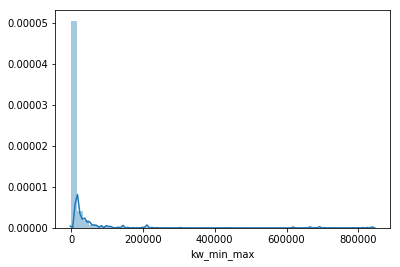

In [103]:
sns.distplot(df.kw_min_max)


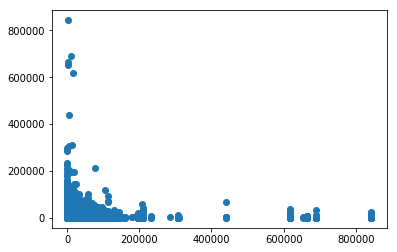

In [104]:
plt.scatter(x='kw_min_max',y='shares',data=df)


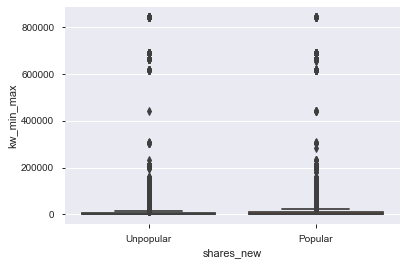

In [278]:
sns.boxplot(x='shares_new',y='kw_min_max',data=df)


As we see, the outliers are almost same for both the sides. 


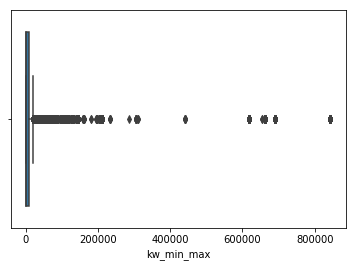

In [106]:
sns.boxplot(df.kw_min_max)


In [107]:
df.kw_min_max.describe()


count     39644.000000
mean      13612.354102
std       57986.029357
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name: kw_min_max, dtype: float64

In [108]:

lower_quartile= 0 -1.5*(7900 - 0)
upper_quartile= 7900 + 1.5*(7900 - 0)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -11850.0
 The upper quartile is 19750.0


# kw_max_max


In [109]:
df.kw_max_max.value_counts()


843300.0    30204
690400.0     3986
617900.0     2263
69100.0      1265
51900.0       829
80400.0       401
39400.0       149
28000.0       131
37400.0       122
17100.0       101
0.0            79
227300.0       72
306100.0        8
104100.0        5
663600.0        4
67500.0         2
73100.0         2
118700.0        2
310800.0        2
441000.0        2
233400.0        1
41600.0         1
57600.0         1
53100.0         1
93800.0         1
139600.0        1
86200.0         1
111300.0        1
15000.0         1
208300.0        1
35800.0         1
210300.0        1
11100.0         1
18200.0         1
27700.0         1
Name: kw_max_max, dtype: int64

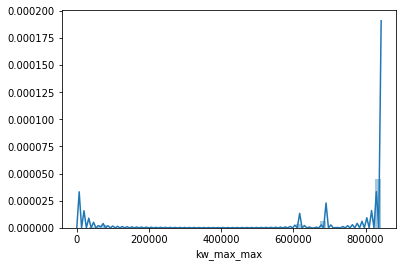

In [110]:
sns.distplot(df.kw_max_max)


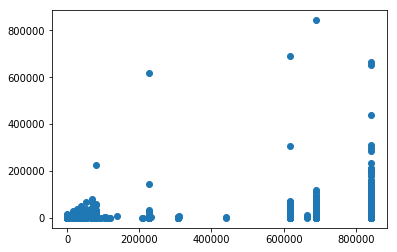

In [111]:
plt.scatter(x='kw_max_max',y='shares',data=df)


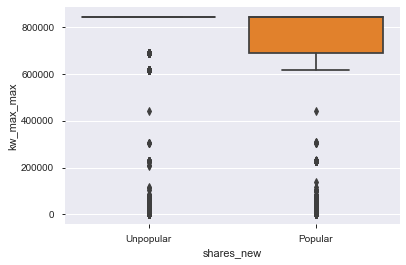

In [279]:
sns.boxplot(x='shares_new',y='kw_max_max',data=df)


As we see popular news have best words giving max shares between 6500-8000

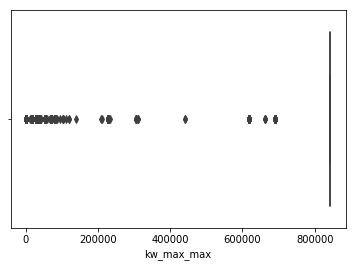

In [113]:
sns.boxplot(df.kw_max_max)


In [114]:
df.kw_max_max.describe()


count     39644.000000
mean     752324.066694
std      214502.129573
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64

In [115]:
lower_quartile= 843300 -1.5*(843300 - 843300)
upper_quartile= 843300 + 1.5*(843300 - 843300)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 843300.0
 The upper quartile is 843300.0


# kw_avg_max


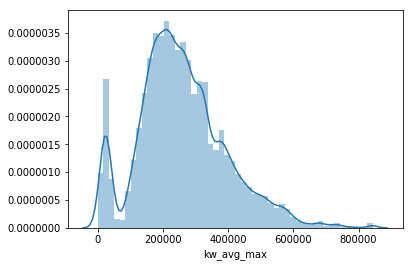

In [116]:
sns.distplot(df.kw_avg_max)


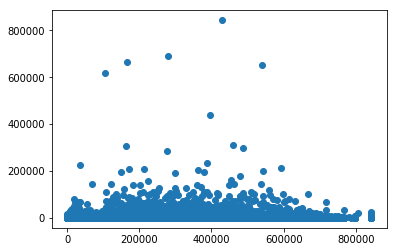

In [117]:
plt.scatter(x='kw_avg_max', y='shares', data=df)


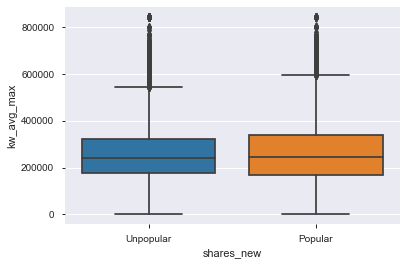

In [280]:
sns.boxplot(x='shares_new',y='kw_avg_max',data=df)


As we see, the outliers are almost same for both the sides.


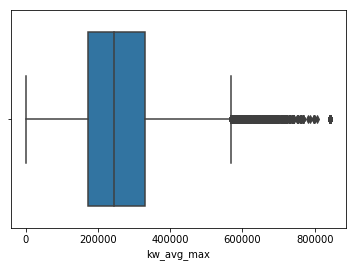

In [119]:
sns.boxplot(df.kw_avg_max)


In [120]:
df.kw_avg_max.describe()


count     39644.000000
mean     259281.938083
std      135102.247285
min           0.000000
25%      172846.875000
50%      244572.222223
75%      330980.000000
max      843300.000000
Name: kw_avg_max, dtype: float64

In [121]:
lower_quartile= 172846.87 -1.5*(330980 - 172846.87)
upper_quartile= 330980 + 1.5*(330980 - 172846.87)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -64352.82500000001
 The upper quartile is 568179.6950000001


# kw_min_avg


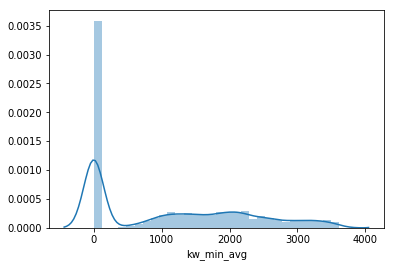

In [122]:
sns.distplot(df.kw_min_avg)


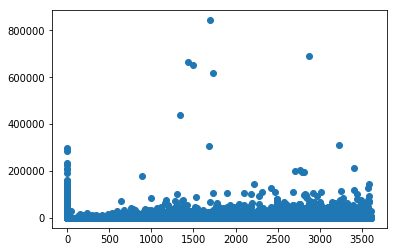

In [123]:
plt.scatter(x='kw_min_avg',y='shares',data=df)


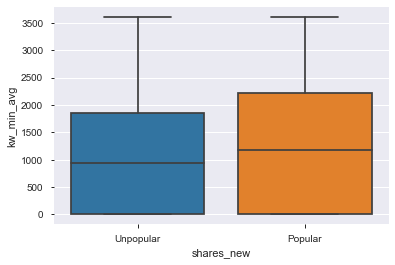

In [281]:
sns.boxplot(x='shares_new',y='kw_min_avg',data=df)


As we see, there are no outliers for this data.


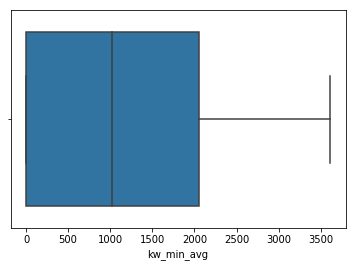

In [125]:
sns.boxplot(df.kw_min_avg)


# kw_max_avg


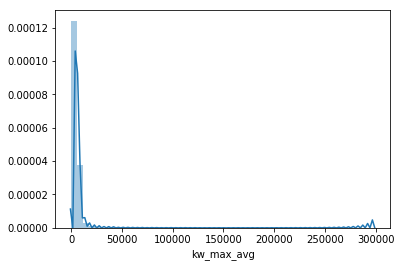

In [126]:
sns.distplot(df.kw_max_avg)


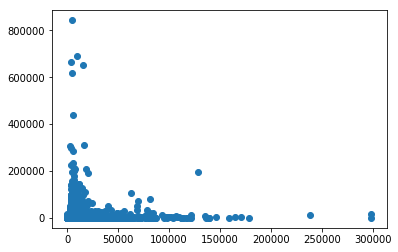

In [127]:
plt.scatter(x='kw_max_avg',y='shares', data =df)


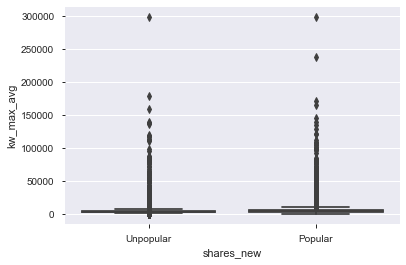

In [282]:
sns.boxplot(x='shares_new',y='kw_max_avg',data=df)


As we see, there are more outliers for popular news!


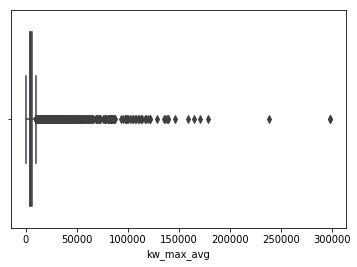

In [129]:
sns.boxplot(df.kw_max_avg)


In [130]:
df.kw_max_avg.describe()


count     39644.000000
mean       5657.211151
std        6098.871957
min           0.000000
25%        3562.101631
50%        4355.688836
75%        6019.953968
max      298400.000000
Name: kw_max_avg, dtype: float64

In [131]:
lower_quartile= 3562.10 -1.5*(6019.95 - 3562.10)
upper_quartile= 6019.95 + 1.5*(6019.95 - 3562.10)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)


 The lower quartile is -124.67499999999973
 The upper quartile is 9706.724999999999


# kw_avg_avg


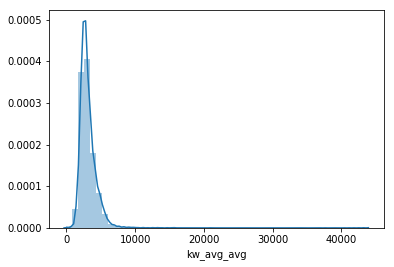

In [132]:
sns.distplot(df.kw_avg_avg)


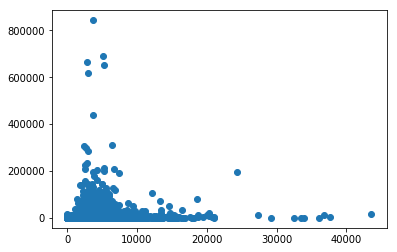

In [133]:
plt.scatter(x='kw_avg_avg', y='shares', data=df)


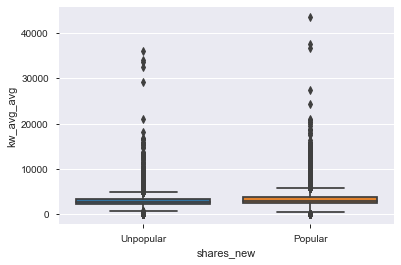

In [283]:
sns.boxplot(x='shares_new',y='kw_avg_avg',data=df)


As we see, there are more outliers for popular news!


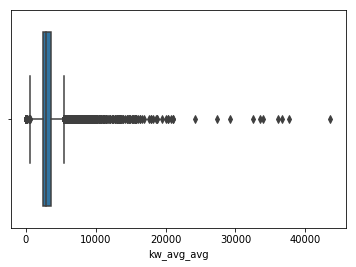

In [135]:
sns.boxplot(df.kw_avg_avg)


In [136]:
df.kw_avg_avg.describe()


count    39644.000000
mean      3135.858639
std       1318.150397
min          0.000000
25%       2382.448566
50%       2870.074878
75%       3600.229564
max      43567.659946
Name: kw_avg_avg, dtype: float64

In [137]:
lower_quartile= 2382.44 -1.5*(3600.22 - 2382.44)
upper_quartile= 3600.22 + 1.5*(3600.22 - 2382.44)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 555.7700000000004
 The upper quartile is 5426.889999999999


# self_reference_min_shares


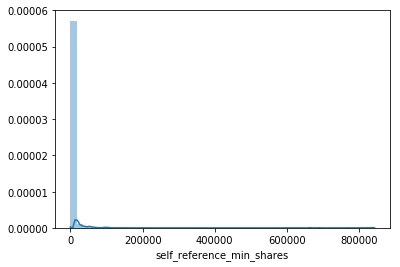

In [138]:
sns.distplot(df.self_reference_min_shares)


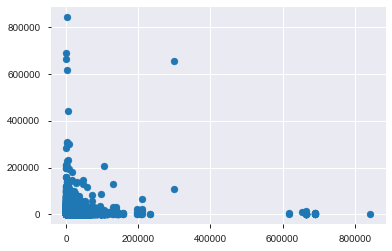

In [40]:
plt.scatter(x='self_reference_min_shares', y='shares', data = df)


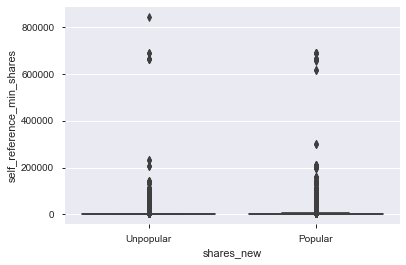

In [284]:
sns.boxplot(x='shares_new',y='self_reference_min_shares',data=df)


As we see, the outliers are almost same for both the sides but, there are slightly high outliers for popular news!


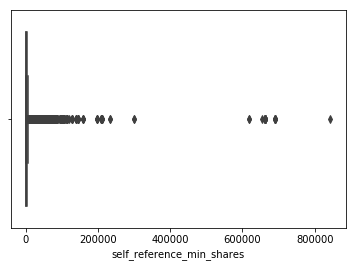

In [141]:
sns.boxplot(df.self_reference_min_shares)


In [142]:
df.self_reference_min_shares.describe()


count     39644.000000
mean       3998.755396
std       19738.670516
min           0.000000
25%         639.000000
50%        1200.000000
75%        2600.000000
max      843300.000000
Name: self_reference_min_shares, dtype: float64

In [143]:
lower_quartile= 639 -1.5*(2600 - 639)
upper_quartile= 2600 + 1.5*(2600 - 639)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -2302.5
 The upper quartile is 5541.5


# self_reference_max_shares


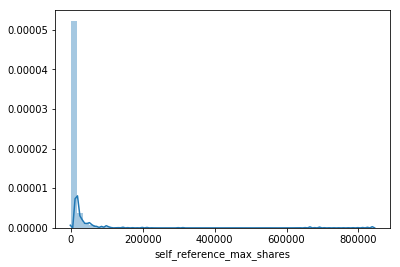

In [144]:
sns.distplot(df.self_reference_max_shares)


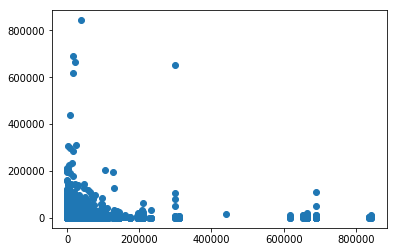

In [145]:
plt.scatter(x='self_reference_max_shares', y='shares', data=df)


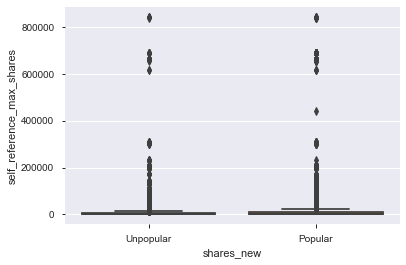

In [285]:
sns.boxplot(x='shares_new',y='self_reference_max_shares',data=df)


As we see, the outliers are almost same for both the sides.


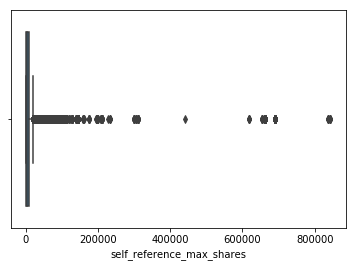

In [147]:
sns.boxplot(df.self_reference_max_shares)


In [148]:
df.self_reference_max_shares.describe()


count     39644.000000
mean      10329.212662
std       41027.576613
min           0.000000
25%        1100.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64

In [149]:
lower_quartile= 1100 -1.5*(8000 - 1100)
upper_quartile= 8000 + 1.5*(8000 - 1100)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)


 The lower quartile is -9250.0
 The upper quartile is 18350.0


# self_reference_avg_sharess


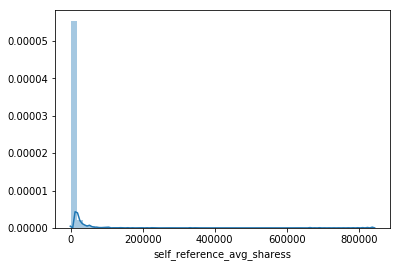

In [150]:
sns.distplot(df.self_reference_avg_sharess)


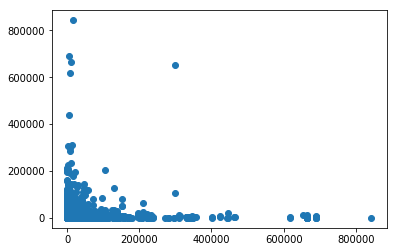

In [151]:
plt.scatter(x='self_reference_avg_sharess', y='shares', data=df)


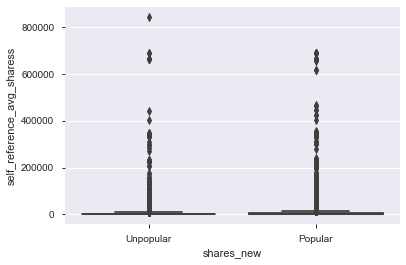

In [286]:
sns.boxplot(x='shares_new',y='self_reference_avg_sharess',data=df)


As we see, the outliers are almost same for both the sides but, there are slightly more outliers for popular news!

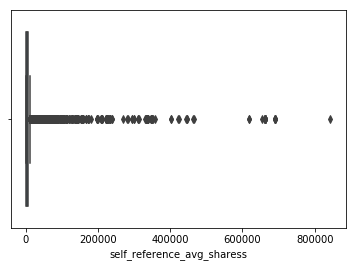

In [153]:
sns.boxplot(df.self_reference_avg_sharess)


In [154]:
df.self_reference_avg_sharess.describe()


count     39644.000000
mean       6401.697580
std       24211.332231
min           0.000000
25%         981.187500
50%        2200.000000
75%        5200.000000
max      843300.000000
Name: self_reference_avg_sharess, dtype: float64

In [155]:
lower_quartile= 981.18 -1.5*(5200 - 981.18)
upper_quartile= 5200 + 1.5*(5200 - 981.18)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -5347.049999999999
 The upper quartile is 11528.23


### For LDA_00 Variable


In [156]:
df.LDA_00.value_counts()


0.200000    51
0.050000    17
0.050000    14
0.050000    12
0.920000    12
0.040000    10
0.066667     9
0.066667     9
0.066667     8
0.066667     7
0.920000     7
0.066667     6
0.050000     6
0.050000     5
0.066667     5
0.040000     5
0.040000     4
0.040000     4
0.040000     4
0.050000     4
0.839998     4
0.050000     3
0.022222     3
0.066667     3
0.040000     3
0.799997     3
0.899999     3
0.050000     3
0.028571     3
0.066667     3
            ..
0.041612     1
0.544555     1
0.029167     1
0.367690     1
0.022867     1
0.025007     1
0.454484     1
0.196769     1
0.866398     1
0.213318     1
0.022406     1
0.025042     1
0.290690     1
0.022224     1
0.020001     1
0.022222     1
0.033335     1
0.604894     1
0.028576     1
0.033341     1
0.022318     1
0.028629     1
0.148230     1
0.417105     1
0.028573     1
0.799756     1
0.033341     1
0.029491     1
0.028572     1
0.033343     1
Name: LDA_00, Length: 39337, dtype: int64

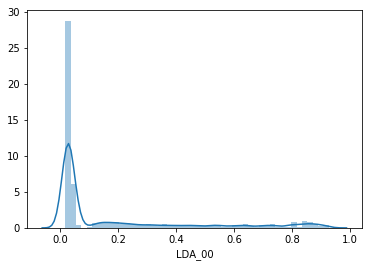

In [157]:
sns.distplot(df['LDA_00'])


#### The data is not normal but right skewed or closeness to LDA topic 0  in the content is increasing towards a higher value 


In [158]:
df['LDA_00'].describe()


count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64

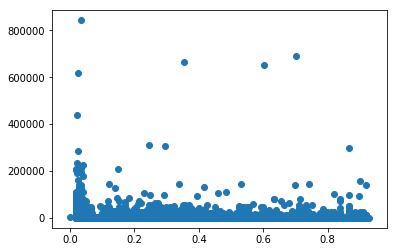

In [159]:
plt.scatter(x='LDA_00',y='shares',data=df)


### Their is no correlation between the variables. We can see maximum number of closeness of LDA topic 0 is decreasing as the shares increases.


## Bivariate Analysis of LDA_00 with new target variable


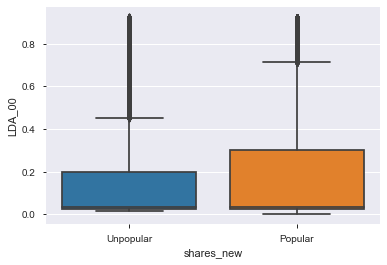

In [287]:
sns.boxplot(x='shares_new',y='LDA_00',data=df)


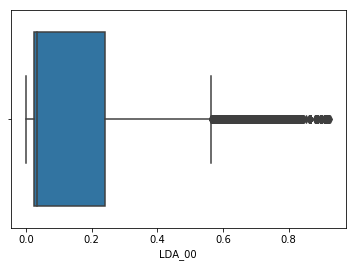

In [161]:
sns.boxplot(df['LDA_00'])


#### As we can see from the above plot that there are a lot of outliers as it is heavily right skewed.


In [162]:
df['LDA_00'].describe()


count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64

In [163]:
lower_quartile=0.025-1.5*(0.24-0.025)
upper_quartile=0.24+1.5*(0.24-0.025)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.2975
 The upper quartile is 0.5625


## For LDA_01


In [164]:
df.LDA_01.value_counts()


0.200000    51
0.050000    36
0.066667    30
0.066667    25
0.040000    24
0.066667    22
0.066667    20
0.050000    16
0.050000    15
0.040000    12
0.050000    11
0.020000    11
0.050000    10
0.040000     9
0.025000     9
0.050000     9
0.066667     8
0.050000     8
0.040000     6
0.050000     6
0.066667     6
0.050000     6
0.040000     6
0.025000     5
0.033333     5
0.033333     5
0.040000     5
0.033333     5
0.040000     5
0.020000     5
            ..
0.124937     1
0.884712     1
0.029193     1
0.040015     1
0.578905     1
0.199301     1
0.028684     1
0.020026     1
0.040000     1
0.507167     1
0.672724     1
0.022228     1
0.040048     1
0.198769     1
0.028799     1
0.374150     1
0.028584     1
0.040018     1
0.508661     1
0.020002     1
0.211280     1
0.050005     1
0.020004     1
0.022230     1
0.218355     1
0.050000     1
0.326423     1
0.140247     1
0.416734     1
0.000000     1
Name: LDA_01, Length: 39098, dtype: int64

In [324]:
from pyforest import *

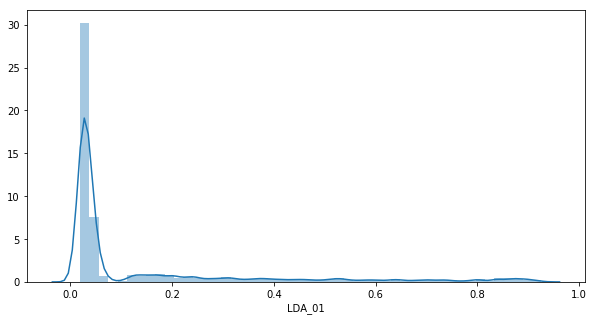

In [325]:
plt.figure(figsize=(10,5))
sns.distplot(df['LDA_01'])
plt.show()

In [319]:
from pylab import *
import matplotlib as plt

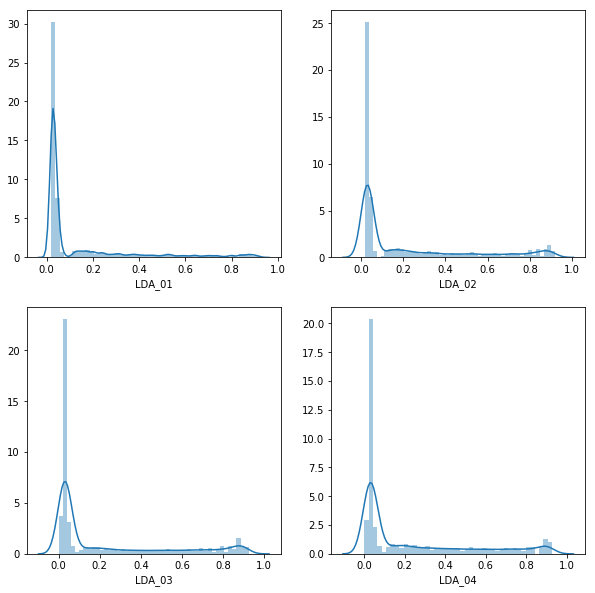

In [328]:
plt.figure(figsize = (10,10))

subplot(2,2,1)
sns.distplot(df['LDA_01'])

subplot(2,2,2)
sns.distplot(df['LDA_02'])

subplot(2,2,3)
sns.distplot(df['LDA_03'])

subplot(2,2,4)
sns.distplot(df['LDA_04'])


show()

#### The data is not normal but right skewed or closeness to LDA topic 1  in the content is increasing towards a higher value 


In [166]:
df['LDA_01'].describe()


count    39644.000000
mean         0.141256
std          0.219707
min          0.000000
25%          0.025012
50%          0.033345
75%          0.150831
max          0.925947
Name: LDA_01, dtype: float64

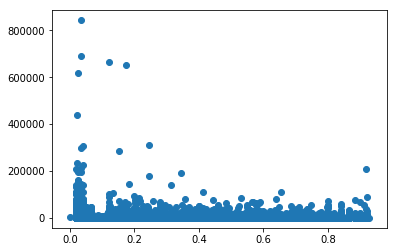

In [167]:
plt.scatter(x='LDA_01',y='shares',data=df)


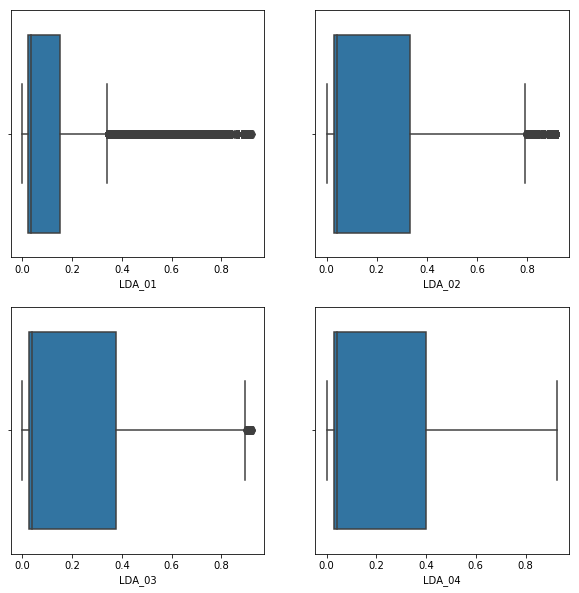

In [329]:
plt.figure(figsize = (10,10))

subplot(2,2,1)
sns.boxplot(df['LDA_01'])

subplot(2,2,2)
sns.boxplot(df['LDA_02'])

subplot(2,2,3)
sns.boxplot(df['LDA_03'])

subplot(2,2,4)
sns.boxplot(df['LDA_04'])


show()

### From the above plot it shows that the number of closeness of LDA_01 has maximum number of shares at 0 value. We can also see maximum number of closeness of LDA topic 1 is decreasing as the shares increases.


## Bivariate analysis of LDA_01 with new target variable shares_new


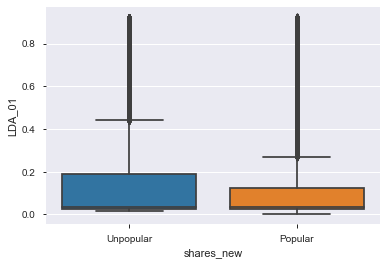

In [288]:
sns.boxplot(x='shares_new',y='LDA_01',data=df)


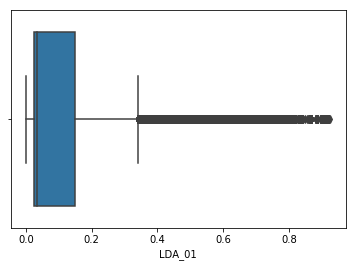

In [169]:
sns.boxplot(df['LDA_01'])


#### As we can see from the above plot that there are a lot of outliers as it is heavily right skewed.


In [170]:
df['LDA_01'].describe()


count    39644.000000
mean         0.141256
std          0.219707
min          0.000000
25%          0.025012
50%          0.033345
75%          0.150831
max          0.925947
Name: LDA_01, dtype: float64

In [289]:
### calculating the lower and Upper quartile value

lower_quartile=0.025-1.5*(0.15-0.025)
upper_quartile=0.15+1.5*(0.15-0.025)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.1625
 The upper quartile is 0.3375


## LDA_02


In [172]:
df.LDA_02.value_counts()


0.200000    51
0.020000     6
0.022222     5
0.020000     4
0.028571     3
0.025000     3
0.020000     3
0.839996     3
0.040001     3
0.040000     2
0.050000     2
0.025000     2
0.799996     2
0.040001     2
0.100000     2
0.799995     2
0.033333     2
0.033333     2
0.040000     2
0.839999     2
0.100000     2
0.839997     2
0.799999     2
0.033333     2
0.040000     2
0.066667     2
0.799995     2
0.020000     2
0.839997     2
0.040000     2
            ..
0.025177     1
0.050000     1
0.599916     1
0.193634     1
0.020010     1
0.033449     1
0.033336     1
0.222144     1
0.355726     1
0.022223     1
0.485576     1
0.698710     1
0.040000     1
0.028579     1
0.167314     1
0.040141     1
0.040002     1
0.689495     1
0.613884     1
0.022334     1
0.899997     1
0.020012     1
0.028572     1
0.033334     1
0.033334     1
0.033336     1
0.028573     1
0.025023     1
0.199155     1
0.000000     1
Name: LDA_02, Length: 39525, dtype: int64

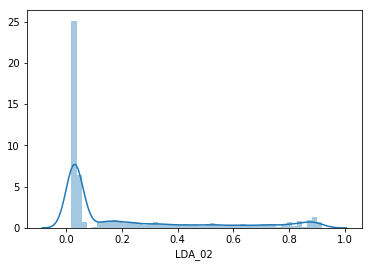

In [173]:
sns.distplot(df['LDA_02'])


#### The data is not normal but right skewed or closeness to LDA topic 2  in the content is increasing towards a higher value 


In [174]:
df['LDA_02'].describe()


count    39644.000000
mean         0.216321
std          0.282145
min          0.000000
25%          0.028571
50%          0.040004
75%          0.334218
max          0.919999
Name: LDA_02, dtype: float64

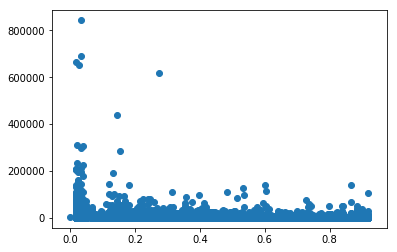

In [175]:
plt.scatter(x='LDA_02',y='shares',data=df)


### As from the above plot it shows  that the number of closeness of LDA_02 has maximum number of shares at 0 value. We can also see maximum number of closeness of LDA topic 2 is decreasing as the shares increases.


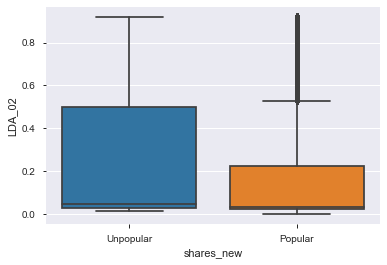

In [290]:
sns.boxplot(x='shares_new',y='LDA_02',data=df)


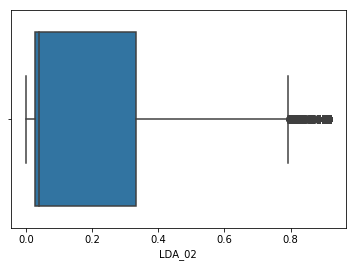

In [177]:
sns.boxplot(df['LDA_02'])


#### As we can see from the above plot that there are outliers present as it is heavily right skewed.


In [178]:
df['LDA_02'].describe()


count    39644.000000
mean         0.216321
std          0.282145
min          0.000000
25%          0.028571
50%          0.040004
75%          0.334218
max          0.919999
Name: LDA_02, dtype: float64

In [179]:
### Calculating the lower and upper quartile.

lower_quartile=0.028-1.5*(0.33-0.028)
upper_quartile=0.33+1.5*(0.33-0.028)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.42499999999999993
 The upper quartile is 0.7829999999999999


## For LdA_03 variable


In [180]:
df.LDA_03.value_counts()


0.066667    58
0.200000    51
0.050000    25
0.040000    25
0.020000    19
0.050000    19
0.050000    18
0.050000    18
0.050000    14
0.040000    13
0.066667    12
0.040000    11
0.066667    10
0.050000     9
0.025000     9
0.066667     8
0.066667     8
0.040000     8
0.100000     8
0.050000     7
0.022222     6
0.066667     6
0.066667     6
0.050000     6
0.050000     6
0.040000     6
0.040000     6
0.066667     5
0.033333     5
0.066667     5
            ..
0.453754     1
0.050001     1
0.020000     1
0.033333     1
0.698285     1
0.331788     1
0.022299     1
0.025441     1
0.033411     1
0.022224     1
0.050136     1
0.020000     1
0.201488     1
0.466834     1
0.240796     1
0.022249     1
0.028847     1
0.020001     1
0.745126     1
0.028631     1
0.051061     1
0.022224     1
0.033813     1
0.028572     1
0.865702     1
0.609476     1
0.775072     1
0.040001     1
0.020023     1
0.000000     1
Name: LDA_03, Length: 38963, dtype: int64

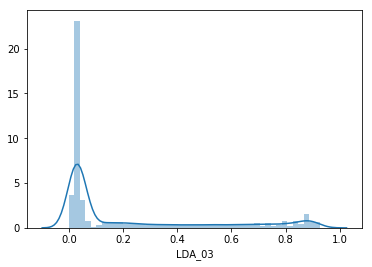

In [181]:
sns.distplot(df['LDA_03'])


#### The data is not normal but right skewed or closeness to LDA topic 3  in the content is increasing towards a higher value 


In [182]:
df['LDA_03'].describe()

count    39644.000000
mean         0.223770
std          0.295191
min          0.000000
25%          0.028571
50%          0.040001
75%          0.375763
max          0.926534
Name: LDA_03, dtype: float64

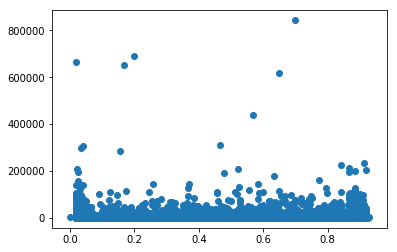

In [183]:
plt.scatter(x='LDA_03',y='shares',data=df)


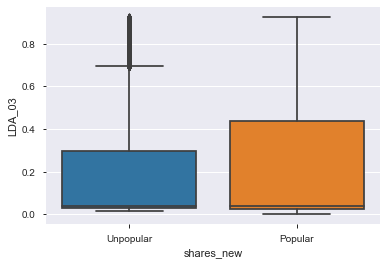

In [291]:
### From the above result we can see no such pattern and the share value of number of closeness of topic 3  is higher near 0.8 .

## Bivariate analysis of LDA_03 with new target variable shares_new

sns.boxplot(x='shares_new',y='LDA_03',data=df)

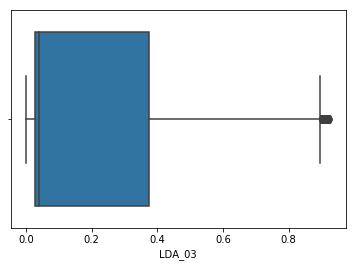

In [185]:
sns.boxplot(df['LDA_03'])


In [186]:
#### As we can see from the above plot that there are outliers present as it is right skewed.

df['LDA_03'].describe()

count    39644.000000
mean         0.223770
std          0.295191
min          0.000000
25%          0.028571
50%          0.040001
75%          0.375763
max          0.926534
Name: LDA_03, dtype: float64

In [187]:
lower_quartile=0.028-1.5*(0.37-0.028)
upper_quartile=0.37+1.5*(0.37-0.028)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.4849999999999999
 The upper quartile is 0.8829999999999999


## for LDA_04


In [188]:
df.LDA_04.value_counts()


0.200000    51
0.020000    19
0.066667     8
0.040000     8
0.040000     6
0.050000     5
0.040000     5
0.050000     5
0.040000     5
0.050000     5
0.040000     5
0.066667     4
0.050000     4
0.040000     4
0.025000     4
0.040000     4
0.040000     4
0.040000     4
0.040000     4
0.050000     3
0.050000     3
0.050000     3
0.040000     3
0.033333     3
0.050000     3
0.028572     3
0.050000     3
0.040000     3
0.050000     3
0.040000     3
            ..
0.022223     1
0.025368     1
0.133117     1
0.028601     1
0.033339     1
0.028952     1
0.020008     1
0.066668     1
0.264322     1
0.029765     1
0.171373     1
0.033344     1
0.885711     1
0.033336     1
0.025000     1
0.344386     1
0.066667     1
0.033334     1
0.020077     1
0.050004     1
0.386795     1
0.028572     1
0.025082     1
0.020004     1
0.033334     1
0.346091     1
0.028579     1
0.029033     1
0.416091     1
0.899697     1
Name: LDA_04, Length: 39370, dtype: int64

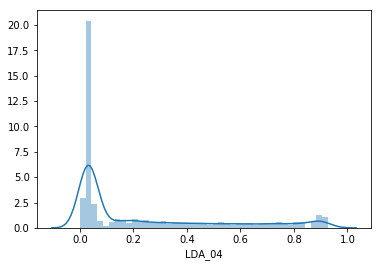

In [189]:
sns.distplot(df['LDA_04'])


#### The data is not normal but right skewed or closeness to LDA topic 4  in the content is increasing towards a higher value. 


In [190]:
df['LDA_04'].describe()


count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64

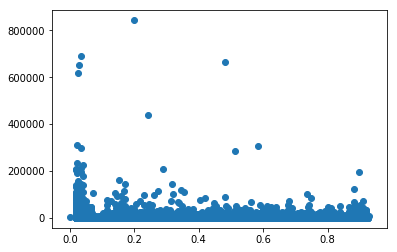

In [191]:
plt.scatter(x='LDA_04',y='shares',data=df)


#### As we can see from the above result that the number of shares of closeness of topic 4 is  higher arround 0 value. 

## Bivariate analysis of LDA_04 with new target variable shares_new

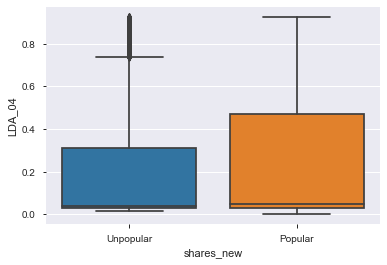

In [292]:
sns.boxplot(x='shares_new',y='LDA_04',data=df)


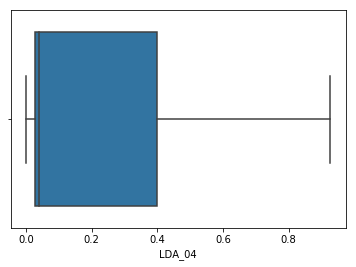

In [193]:
sns.boxplot(df['LDA_04'])


In [194]:
### Above plot shows no outliers present in this variable.

df['LDA_04'].describe()



count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64

In [195]:
lower_quartile=0.028-1.5*(0.39-0.028)
upper_quartile=0.39+1.5*(0.39-0.028)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.5149999999999999
 The upper quartile is 0.9329999999999999


## for  global_subjectivity


In [196]:
df['global_subjectivity'].describe()


count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64

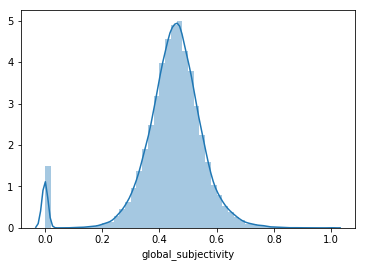

In [197]:
sns.distplot(df['global_subjectivity'])


In [198]:
df['global_subjectivity'].describe()


count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64

### As we see n_tokens_title does not follow normal distribution but follows skewness on either ends equally. We can infer that global_subjectivity is 1 maximum and 0.0 minimum. The average of global_subjectivity is 0.44.


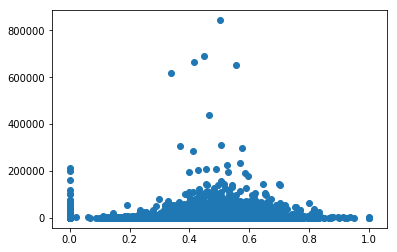

In [199]:
plt.scatter(x='global_subjectivity',y='shares',data=df)



### This does not follow any pattern.We see from the above , maximum shares is for number of words around 0.5.

## Bivariate analysis of global_subjectivity with new target variable shares_new


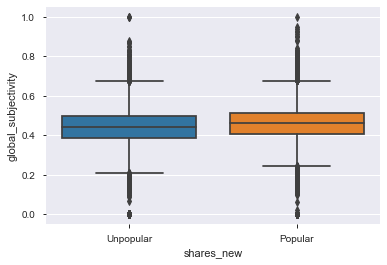

In [293]:
sns.boxplot(x='shares_new',y='global_subjectivity',data=df)


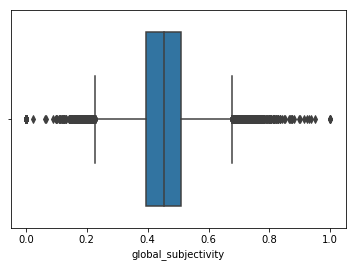

In [201]:
sns.boxplot(df['global_subjectivity'])


In [202]:
### There are many outliers and lies on both ends of the lower and upper quartile range.

df['global_subjectivity'].describe()



count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64

In [203]:
lower_quartile=0.39-1.5*(0.50-0.39)
upper_quartile=0.50+1.5*(0.50-0.39)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 0.22500000000000003
 The upper quartile is 0.665


## for global_sentiment_polarity


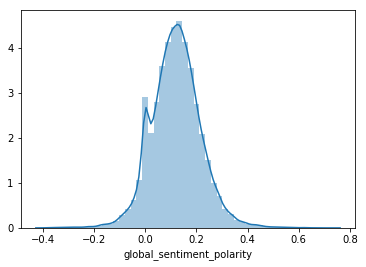

In [204]:
sns.distplot(df['global_sentiment_polarity'])


### As we see n_tokens_title does not follow normal distribution but follows skewness on either ends equally. We can infer that global_sentiment_polarity is 0.72 maximum and -0.39 minimum. The average of global_sentiment_polarity is 0.11.


In [205]:
df['global_sentiment_polarity'].describe()


count    39644.000000
mean         0.119309
std          0.096931
min         -0.393750
25%          0.057757
50%          0.119117
75%          0.177832
max          0.727841
Name: global_sentiment_polarity, dtype: float64

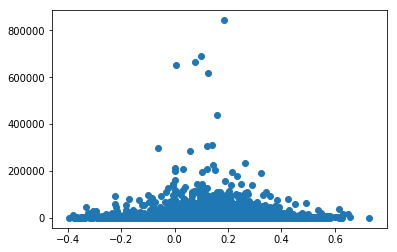

In [206]:
plt.scatter(x='global_sentiment_polarity',y='shares',data=df)


### This does not follow any pattern.We see from the above , maximum shares of global_sentiment_polarity is for number of words around 0.1.

## Bivariate analysis of global_sentiment_polarity with new target variable shares_new

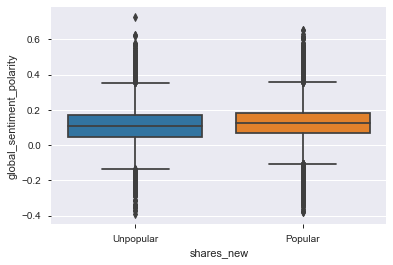

In [294]:
sns.boxplot(x='shares_new',y='global_sentiment_polarity',data=df)


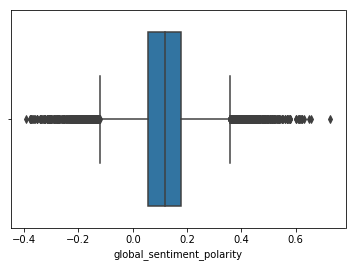

In [208]:
sns.boxplot(df['global_sentiment_polarity'])


In [209]:
### There are many outliers and lies on both ends of the lower and upper quartile range.

df['global_sentiment_polarity'].describe()


count    39644.000000
mean         0.119309
std          0.096931
min         -0.393750
25%          0.057757
50%          0.119117
75%          0.177832
max          0.727841
Name: global_sentiment_polarity, dtype: float64

In [210]:
lower_quartile=0.057-1.5*(0.177-0.057)
upper_quartile=0.177+1.5*(0.177-0.057)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)


 The lower quartile is -0.123
 The upper quartile is 0.357


## for  global_rate_positive_words


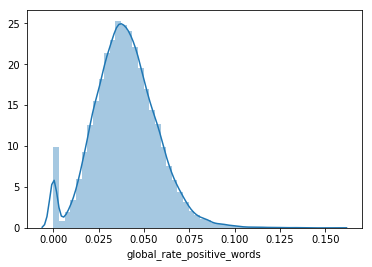

In [211]:
sns.distplot(df['global_rate_positive_words'])


### from the above plot we can see that the data is not normalized and have the clusters. Data is heavily right skewed.


In [212]:
df['global_rate_positive_words'].describe()


count    39644.000000
mean         0.039625
std          0.017429
min          0.000000
25%          0.028384
50%          0.039023
75%          0.050279
max          0.155488
Name: global_rate_positive_words, dtype: float64

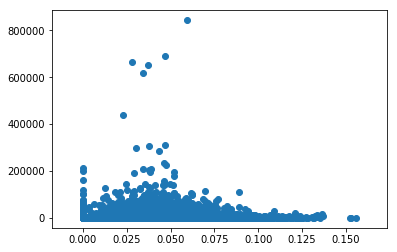

In [213]:
plt.scatter(x='global_rate_positive_words',y='shares',data=df)


### The shares are highest arround 0.040 for global_rate_positive_words and their is no absolute pattern between shares and global_rate_positive_words.

## Bivariate analysis of global_rate_positive_words with new target variable shares_new

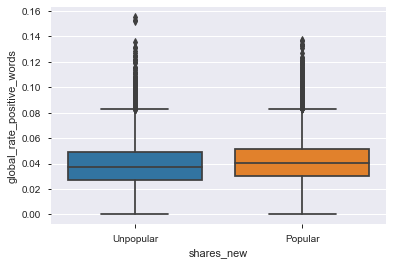

In [295]:
sns.boxplot(x='shares_new',y='global_rate_positive_words',data=df)


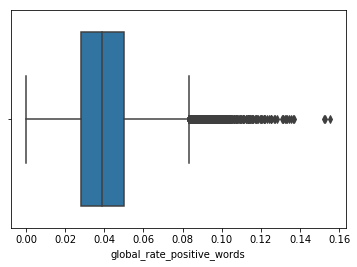

In [215]:
sns.boxplot(df['global_rate_positive_words'])


In [216]:

### As observed above , the number of global_rate_positive_words have heavy outliers beyond upper quartile and thus it is right skewed.

df['global_rate_positive_words'].describe()

count    39644.000000
mean         0.039625
std          0.017429
min          0.000000
25%          0.028384
50%          0.039023
75%          0.050279
max          0.155488
Name: global_rate_positive_words, dtype: float64

In [217]:
lower_quartile=0.028-1.5*(0.050-0.028)
upper_quartile=0.050+1.5*(0.050-0.028)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.005000000000000001
 The upper quartile is 0.083


##  for global_rate_negative_words


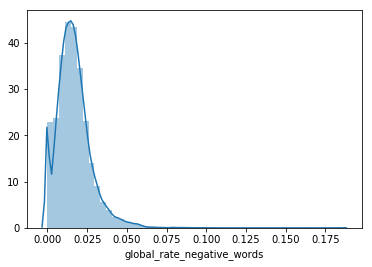

In [218]:
sns.distplot(df['global_rate_negative_words'])


###  from the above plot we can see that the data is not normalized and have the clusters. Data is heavily right skewed.


In [219]:
df['global_rate_negative_words'].describe()


count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64

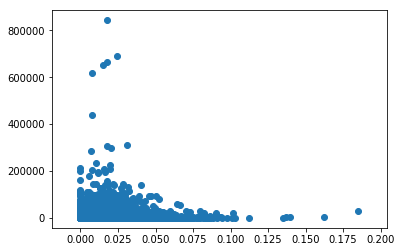

In [220]:
plt.scatter(x='global_rate_negative_words',y='shares',data=df)


### As from the above plot we can see that the shares values of global_rate_negative_words are higher between 0.00 to 0.025. 

## Bivariate analysis of global_rate_negative_words with new target variable shares_new

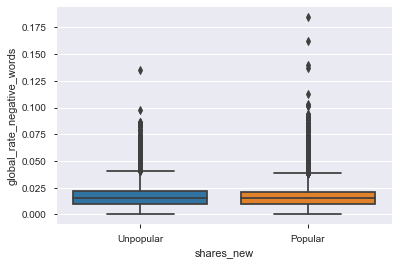

In [296]:
sns.boxplot(x='shares_new',y='global_rate_negative_words',data=df)


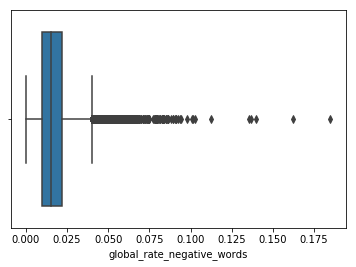

In [222]:
sns.boxplot(df['global_rate_negative_words'])


In [223]:
### As observed there are heavy outliers beyond upper quartile as seen from the boxplot

df['global_rate_negative_words'].describe()

count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64

In [224]:
lower_quartile=0.009-1.5*(0.021-0.009)
upper_quartile=0.021+1.5*(0.021-0.009)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)


 The lower quartile is -0.009000000000000003
 The upper quartile is 0.03900000000000001


## for  rate_positive_words


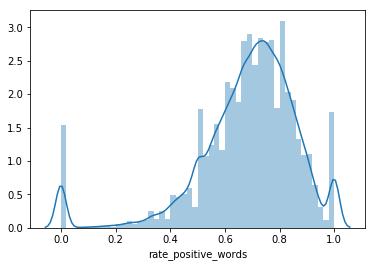

In [225]:
sns.distplot(df['rate_positive_words'])


### As we can from the above plot that the data is not normalized and have the 3 clusters in data . This result have the left skewed values.


In [226]:
df['rate_positive_words'].describe()


count    39644.000000
mean         0.682150
std          0.190206
min          0.000000
25%          0.600000
50%          0.710526
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64

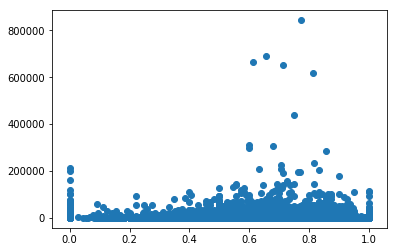

In [227]:
plt.scatter(x='rate_positive_words',y='shares',data=df)


### As we can examine from the above result that the Rate of positive words among non-neutral tokens have the maximum shares arround 0.8. This values does not follow any pattern.

## Bivariate analysis of rate_positive_words with new target variable shares_new


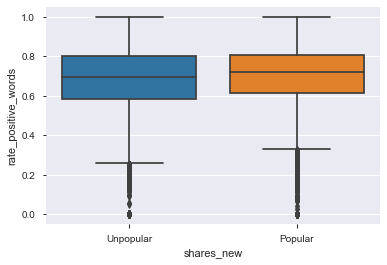

In [297]:
sns.boxplot(x='shares_new',y='rate_positive_words',data=df)


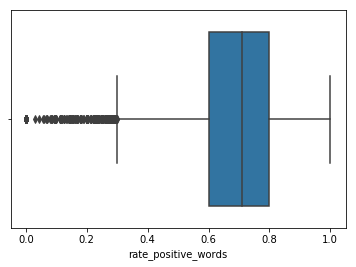

In [229]:
sns.boxplot(df['rate_positive_words'])


In [230]:
### As observed there are heavy outliers at lower quartile as seen from the boxplot.

df['rate_positive_words'].describe()

count    39644.000000
mean         0.682150
std          0.190206
min          0.000000
25%          0.600000
50%          0.710526
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64

In [231]:
lower_quartile=0.60-1.5*(0.80-0.60)
upper_quartile=0.80+1.5*(0.80-0.60)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)


 The lower quartile is 0.2999999999999999
 The upper quartile is 1.1


## for  rate_negative_words


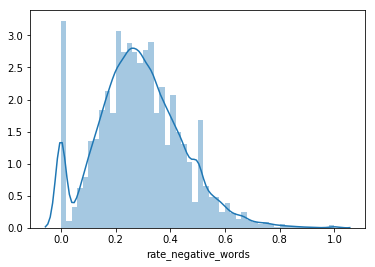

In [232]:
sns.distplot(df['rate_negative_words'])


### we can examine from the result of plot that data is not normalized and have the clusters in data. As observed the Rate of negative words among non-neutral tokens  follows heavy right skewness. 


In [233]:
df['rate_negative_words'].describe()


count    39644.000000
mean         0.287934
std          0.156156
min          0.000000
25%          0.185185
50%          0.280000
75%          0.384615
max          1.000000
Name: rate_negative_words, dtype: float64

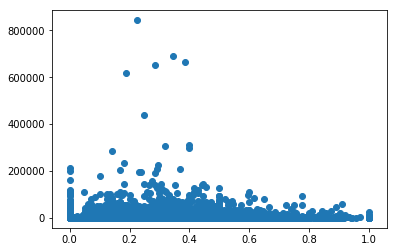

In [234]:
plt.scatter(x='rate_negative_words',y='shares',data=df)



### We can examine that the data does not follow any pattern and Rate of negative words among non-neutral tokens are having more number of shares near 0.3

## Bivariate analysis of rate_negative_words with new target variable shares_new

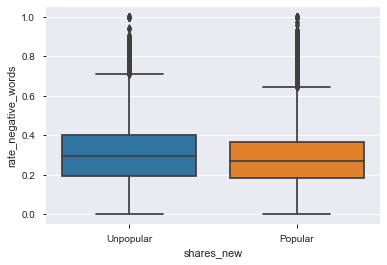

In [298]:
sns.boxplot(x='shares_new',y='rate_negative_words',data=df)


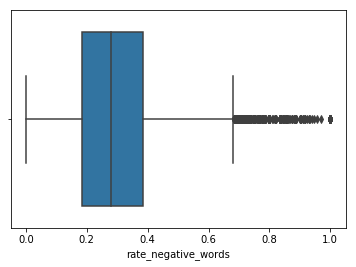

In [236]:
sns.boxplot(df['rate_negative_words'])


In [237]:
### As observed above , the number of rate_negative_words have heavy outliers beyond upper quartile and thus it is right skewed.

df['rate_negative_words'].describe()

count    39644.000000
mean         0.287934
std          0.156156
min          0.000000
25%          0.185185
50%          0.280000
75%          0.384615
max          1.000000
Name: rate_negative_words, dtype: float64

In [238]:
lower_quartile=0.185-1.5*(0.384-0.185)
upper_quartile=0.384+1.5*(0.384-0.185)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.11349999999999999
 The upper quartile is 0.6825


## For avg_positive_polarity

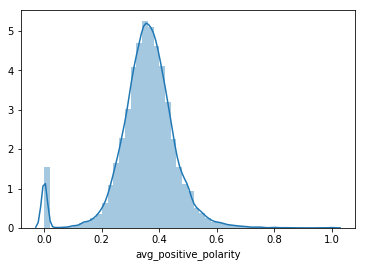

In [239]:
sns.distplot(df['avg_positive_polarity']) ## Mostly rightly skewed but at zero lot's of data are there..so this column has lots of outliers

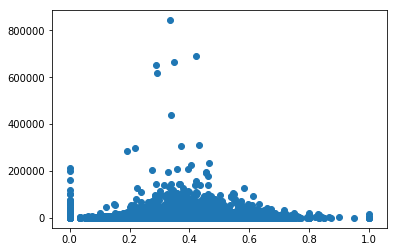

In [240]:
plt.scatter(x='avg_positive_polarity',y='shares',data=df)


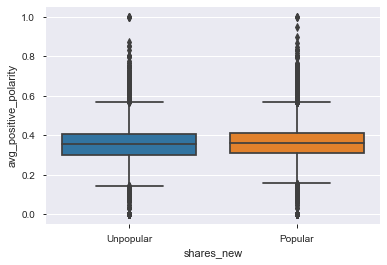

In [299]:
sns.boxplot(x='shares_new',y='avg_positive_polarity',data=df)


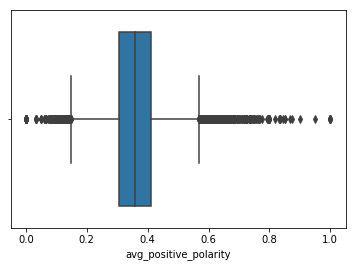

In [242]:
sns.boxplot(df['avg_positive_polarity'])

In [243]:
df['avg_positive_polarity'].describe()

count    39644.000000
mean         0.353825
std          0.104542
min          0.000000
25%          0.306244
50%          0.358755
75%          0.411428
max          1.000000
Name: avg_positive_polarity, dtype: float64

In [244]:
lower_quartile=0.306244-1.5*(0.411428-0.306244)
upper_quartile=0.411428+1.5*(0.411428-0.306244)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is 0.14846800000000002
 The upper quartile is 0.569204


## For min_positive_polarity

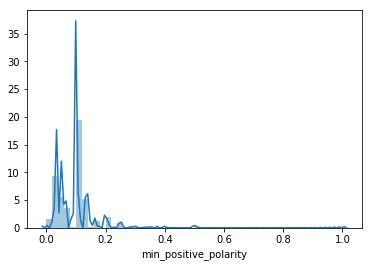

In [245]:
sns.distplot(df['min_positive_polarity']) ## normality is not there 

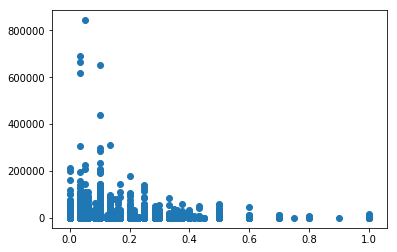

In [246]:
plt.scatter(x='min_positive_polarity',y='shares',data=df)


As observed, the shares is highest between 0.1-0.2  min_positive_polarity as published by mashable!


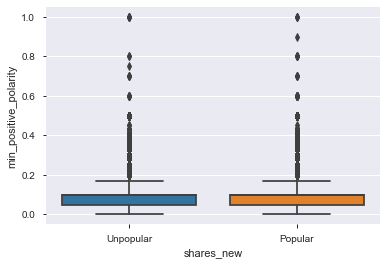

In [300]:
sns.boxplot(x='shares_new',y='min_positive_polarity',data=df)


As observed there is equal number of min positive polarity in both categories.

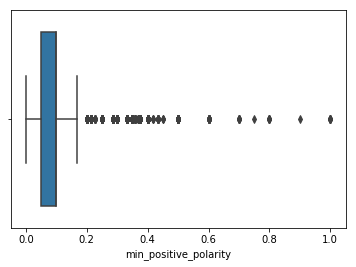

In [248]:
sns.boxplot(df['min_positive_polarity'])


As observed there are heavy outliers beyond upper quartile as seen from the boxplot!


In [249]:
df.min_positive_polarity.describe()


count    39644.000000
mean         0.095446
std          0.071315
min          0.000000
25%          0.050000
50%          0.100000
75%          0.100000
max          1.000000
Name: min_positive_polarity, dtype: float64

In [250]:
lower_quartile=0.050000-1.5*(0.100000-0.050000)
upper_quartile=0.100000+1.5*(0.100000-0.050000)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.02500000000000001
 The upper quartile is 0.17500000000000002


## max_positive_polarity

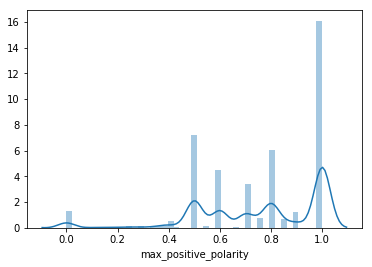

In [251]:
sns.distplot(df['max_positive_polarity'])

As observed max positive polarity has left skewness.


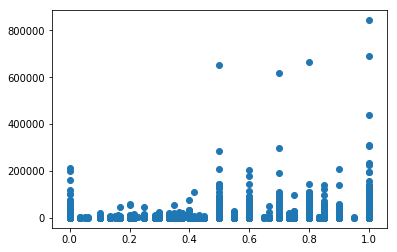

In [252]:
plt.scatter(x='max_positive_polarity',y='shares',data=df)


As observed, the shares is highest between 1 max positive polarity to other.


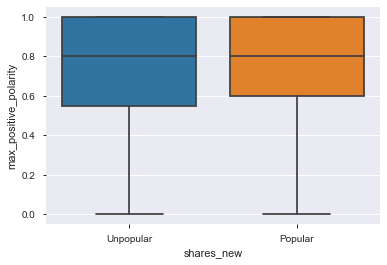

In [301]:
sns.boxplot(x='shares_new',y='max_positive_polarity',data=df)


As observed there is no outlier in both categorise...range starts from 0.57..

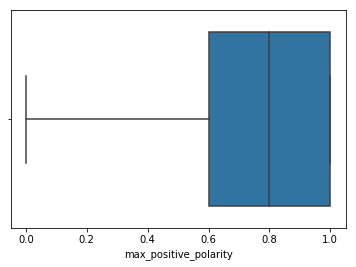

In [254]:
sns.boxplot(df['max_positive_polarity'])


As observed there is no outliers  as seen from the boxplot!


In [255]:
df['max_positive_polarity'].describe()


count    39644.000000
mean         0.756728
std          0.247786
min          0.000000
25%          0.600000
50%          0.800000
75%          1.000000
max          1.000000
Name: max_positive_polarity, dtype: float64

In [256]:
lower_quartile=0.6-1.5*(1-0.6)
upper_quartile=1+1.5*(1-0.6)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -1.1102230246251565e-16
 The upper quartile is 1.6


## avg_negative_polarity

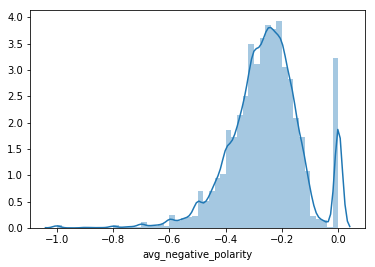

In [257]:
sns.distplot(df['avg_negative_polarity'])

As observed the number of links to other articles published by mashable follows heavy legt skewness.


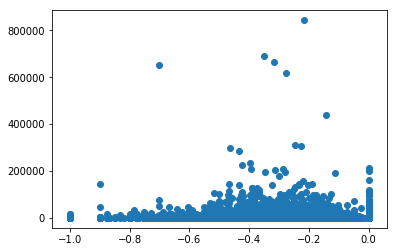

In [258]:
plt.scatter(x='avg_negative_polarity',y='shares',data=df)


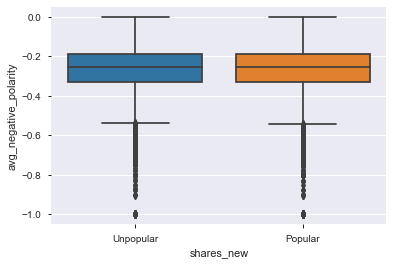

In [302]:
sns.boxplot(x='shares_new',y='avg_negative_polarity',data=df)


As observed the number of links to other articles have equal outliers for news!


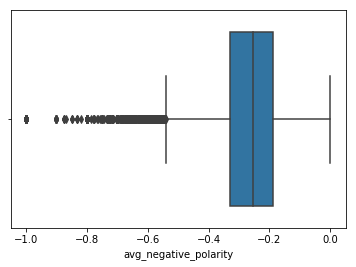

In [260]:
sns.boxplot(df['avg_negative_polarity'])


As observed there are heavy outliers beyond lower quartile as seen from the boxplot!


In [261]:
df['avg_negative_polarity'].describe()


count    39644.000000
mean        -0.259524
std          0.127726
min         -1.000000
25%         -0.328383
50%         -0.253333
75%         -0.186905
max          0.000000
Name: avg_negative_polarity, dtype: float64

In [304]:
lower_quartile=-0.328383-1.5*(-0.186905-(-0.328383))
upper_quartile=-0.186905+1.5*(-0.186905-(-0.328383))
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.5406
 The upper quartile is 0.025312


 ## min_negative_polarity

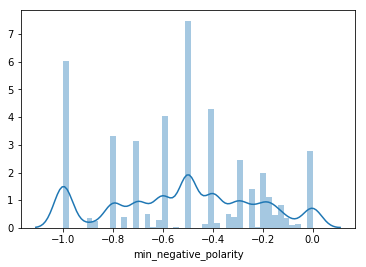

In [263]:
sns.distplot(df['min_negative_polarity'])

As observed min negative polarity doesnot follow normal distribution.

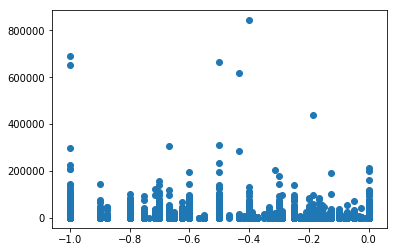

In [264]:
plt.scatter(x='min_negative_polarity',y='shares',data=df)


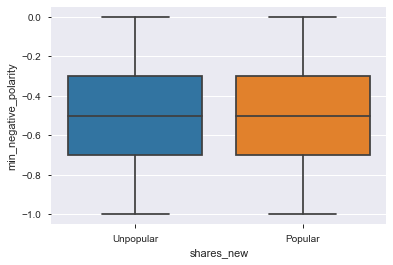

In [305]:
sns.boxplot(x='shares_new',y='min_negative_polarity',data=df)


As observed the number of links to other articles have equal outliers for news! 


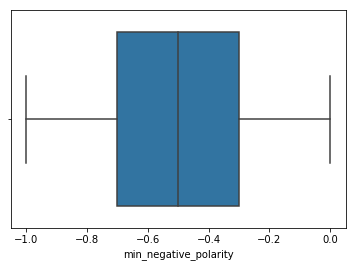

In [266]:
sns.boxplot(df['min_negative_polarity'])


As observed there is no outlier present in data.

## max_negative_polarity

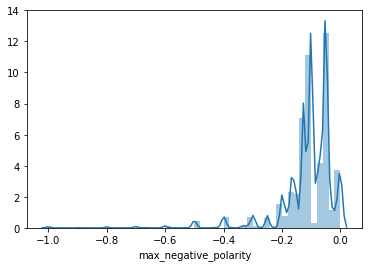

In [267]:
sns.distplot(df['max_negative_polarity'])

As observed the number of links to other articles published by mashable follows heavy left skewness.


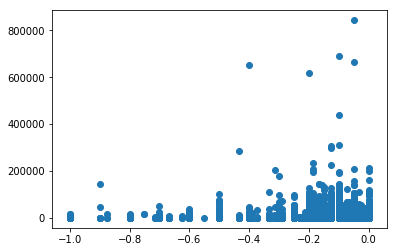

In [268]:
plt.scatter(x='max_negative_polarity',y='shares',data=df)


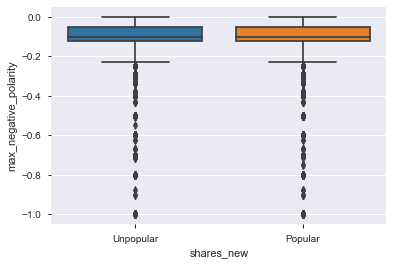

In [306]:
sns.boxplot(x='shares_new',y='max_negative_polarity',data=df)


As observed the number of links to other articles have equal outliers for news.


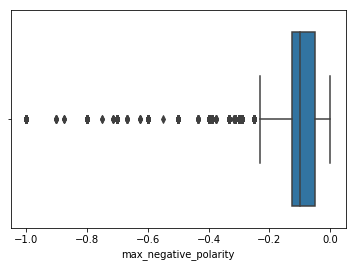

In [270]:
sns.boxplot(df['max_negative_polarity'])


As observed there are heavy outliers beyond lower quartile as seen from the boxplot!


In [271]:
df['max_negative_polarity'].describe()


count    39644.000000
mean        -0.107500
std          0.095373
min         -1.000000
25%         -0.125000
50%         -0.100000
75%         -0.050000
max          0.000000
Name: max_negative_polarity, dtype: float64

In [272]:
lower_quartile=-0.125000-1.5*(-0.050000--0.125000)
upper_quartile=-0.050000+1.5*(-0.050000--0.125000)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.2375
 The upper quartile is 0.062499999999999986


## title_subjectivity

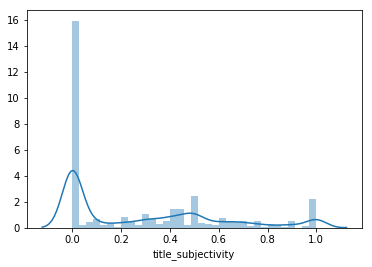

In [273]:
sns.distplot(df['title_subjectivity'])

As observed the number of links to other articles published by mashable follows heavy right skewness.


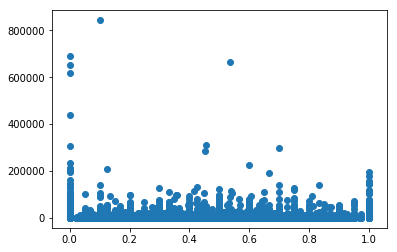

In [274]:
plt.scatter(x='title_subjectivity',y='shares',data=df)


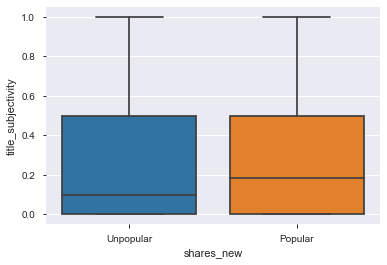

In [307]:
sns.boxplot(x='shares_new',y='title_subjectivity',data=df)


As observed the number of links to other articles have equal outliers for news!


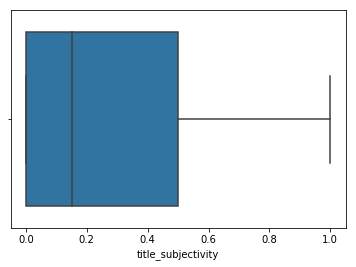

In [276]:
sns.boxplot(df['title_subjectivity'])


As observed there are no outliers beyond  quartile as seen from the boxplot!


In [277]:
df['title_subjectivity'].describe()


count    39644.000000
mean         0.282353
std          0.324247
min          0.000000
25%          0.000000
50%          0.150000
75%          0.500000
max          1.000000
Name: title_subjectivity, dtype: float64

In [278]:
lower_quartile=0-1.5*(0.5-0)
upper_quartile=0.5+1.5*(0.5-0)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.75
 The upper quartile is 1.25


## title_sentiment_polarity

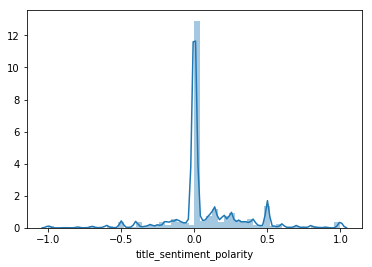

In [279]:
sns.distplot(df['title_sentiment_polarity'])

As observed the number of links to other articles published by mashable follows no normal distribution.


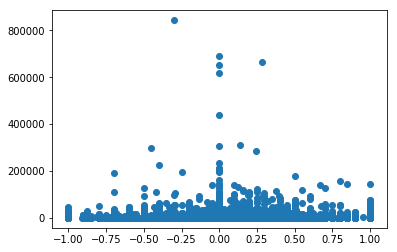

In [280]:
plt.scatter(x='title_sentiment_polarity',y='shares',data=df)


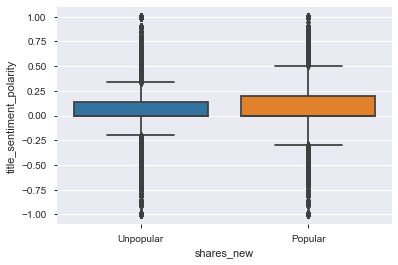

In [308]:
sns.boxplot(x='shares_new',y='title_sentiment_polarity',data=df)


As observed the number of links to other articles have equal outliers for news.

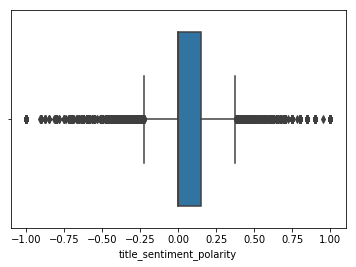

In [282]:
sns.boxplot(df['title_sentiment_polarity'])


As observed there are heavy outliers beyond  quartile as seen from the boxplot!


In [283]:
df['title_sentiment_polarity'].describe()


count    39644.000000
mean         0.071425
std          0.265450
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          1.000000
Name: title_sentiment_polarity, dtype: float64

In [284]:
lower_quartile=0-1.5*(0.15-0)
upper_quartile=0.15+1.5*(0.15-0)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.22499999999999998
 The upper quartile is 0.375


## abs_title_subjectivity

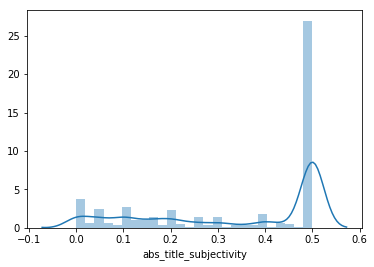

In [285]:
sns.distplot(df['abs_title_subjectivity'])

As observed the number of links to other articles published by mashable follows heavy left skewness.


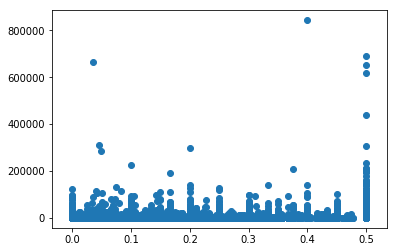

In [286]:
plt.scatter(x='abs_title_subjectivity',y='shares',data=df)


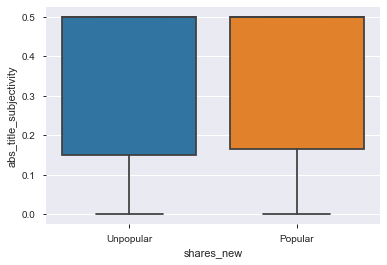

In [309]:
sns.boxplot(x='shares_new',y='abs_title_subjectivity',data=df)


As observed the number of links to other articles have equal distribution for (popular+unpopular)news.


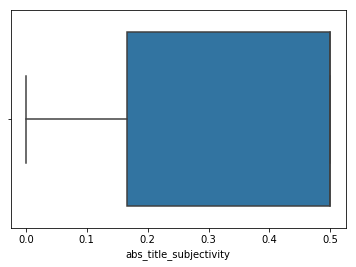

In [289]:
sns.boxplot(df['abs_title_subjectivity'])


As observed there are no outliers beyond  quartile as seen from the boxplot!


In [290]:
df['abs_title_subjectivity'].describe()


count    39644.000000
mean         0.341843
std          0.188791
min          0.000000
25%          0.166667
50%          0.500000
75%          0.500000
max          0.500000
Name: abs_title_subjectivity, dtype: float64

In [291]:
lower_quartile=0.166667-1.5*(0.5-0.166667)
upper_quartile=0.5+1.5*(0.5-0.166667)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -0.3333325
 The upper quartile is 0.9999994999999999


## abs_title_sentiment_polarity

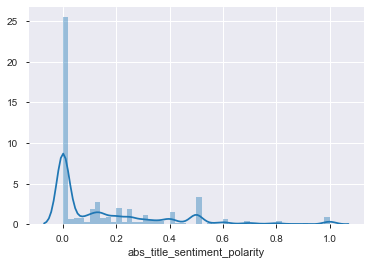

In [310]:
sns.distplot(df['abs_title_sentiment_polarity'])

As observed the abs_title_sentiment_polarity to other articles published by mashable follows heavy right skewness.


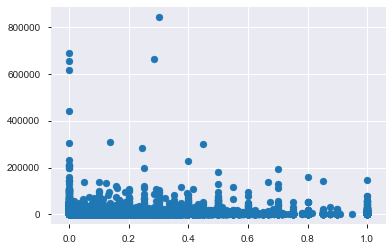

In [311]:
plt.scatter(x='abs_title_sentiment_polarity',y='shares',data=df)


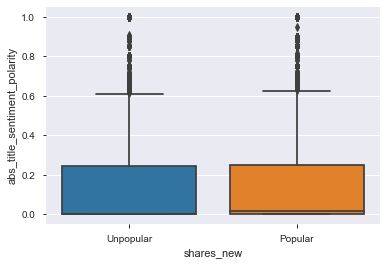

In [312]:
sns.boxplot(x='shares_new',y='abs_title_sentiment_polarity',data=df)


In [ ]:
As observed the abs_title_sentiment_polarity to other articles have almost equal outliers for news.


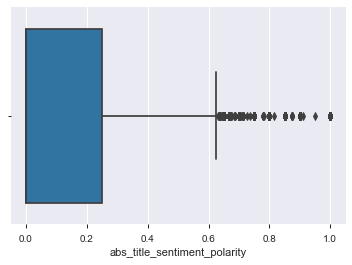

In [313]:
sns.boxplot(df['abs_title_sentiment_polarity'])


As observed there are heavy outliers beyond upper quartile as seen from the boxplot!


In [314]:
df['abs_title_sentiment_polarity'].describe()


count    39644.000000
mean         0.156064
std          0.226294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: abs_title_sentiment_polarity, dtype: float64

In [ ]:
lower_quartile=0-1.5*(0.250000-0)
upper_quartile=0.250000+1.5*(0.250000-0)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

## Shares

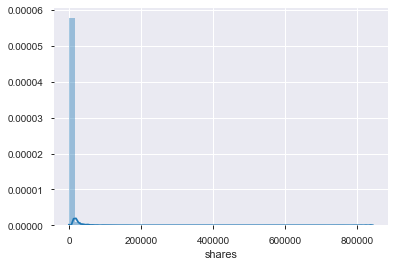

In [315]:
sns.distplot(df.shares)

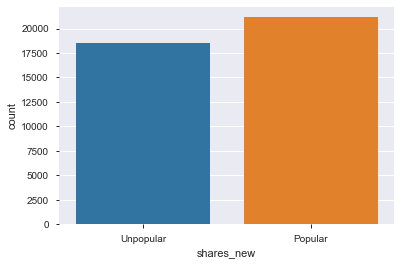

In [316]:
sns.countplot(df.shares_new)  #data is balanced

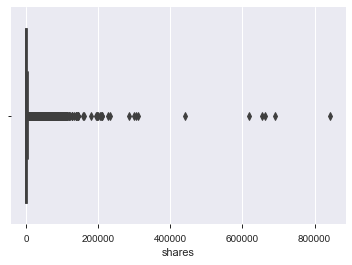

In [317]:
sns.boxplot(df.shares)

In [45]:
df['shares'].describe()


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [49]:
lower_quartile=946-1.5*(2800-946)
upper_quartile=2800+1.5*(2800-946)
print(" The lower quartile is",lower_quartile)
print(" The upper quartile is",upper_quartile)

 The lower quartile is -1835.0
 The upper quartile is 5581.0


## Weekday-weekend

In [318]:
features_raw = df.drop(['url',df.keys()[1],df.keys()[-1]], axis=1)
display(features_raw.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [319]:
columns_day = features_raw.columns.values[29:36]
unpop=df[df['shares']<1400]
pop=df[df['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values



In [320]:
import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

Text(0, 0.5, 'Count')

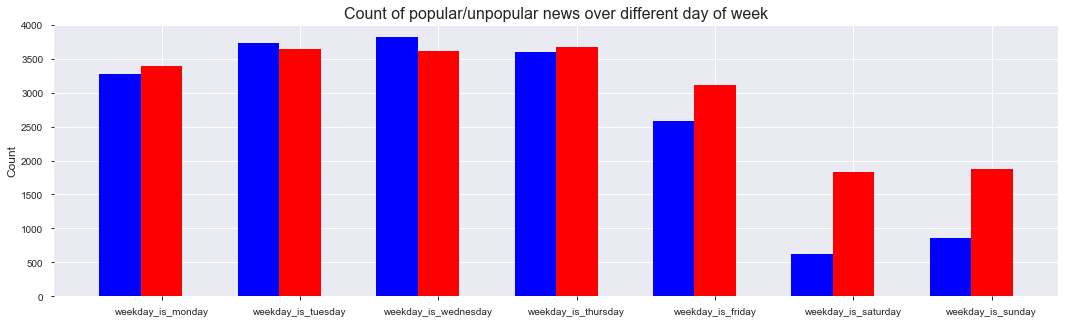

In [321]:
fig = pl.figure(figsize = (18,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)

## Data channel

In [322]:
columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values

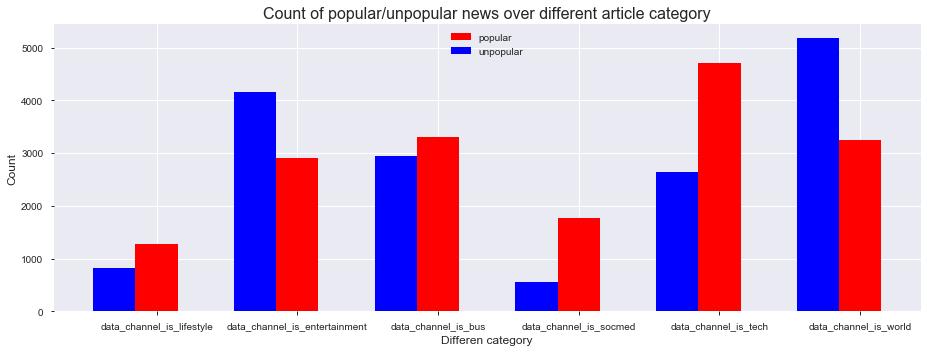

In [323]:
fig = pl.figure(figsize = (13,5))

pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize=12)

pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.pdf")
pl.show()

In [324]:
# Merging the weekdays columns channels as one single column
publishdayMerge=df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')

In [325]:
# Merging the data channels as one single column
DataChannelMerge=df[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [326]:
# merge the the new data into the dataframe
df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)

Wednesday    7435
Tueday       7390
Thursday     7267
Monday       6661
Friday       5701
Sunday       2737
Saturday     2453
Name: weekdays, dtype: int64


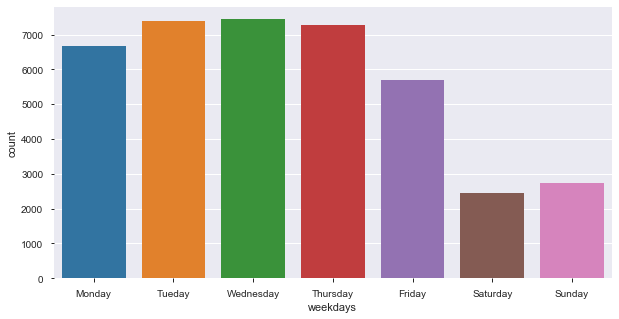

In [328]:
print(df.weekdays.value_counts())
plt.figure(figsize = (10,5))
sns.countplot(df['weekdays'])

World            8427
Tech             7346
Entertainment    7057
Business         6258
Others           6134
Social Media     2323
Lifestyle        2099
Name: data_channel, dtype: int64


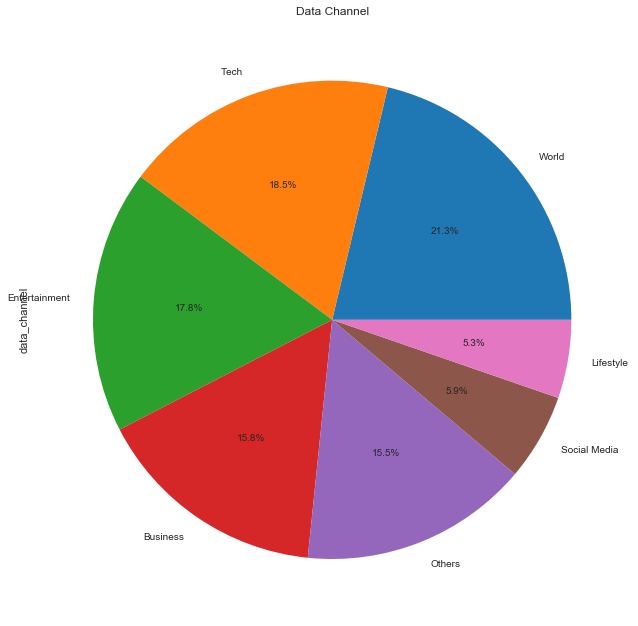

In [16]:
plt.figure(figsize =(16,11))
plt.title('Data Channel')
print(df.data_channel.value_counts())
df.data_channel.value_counts().plot(kind='pie', autopct='%1.1f%%',title = None)

In [329]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_new
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [330]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'weekdays',
       'data_channel', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global

## Creating Base models without using feature selection,extraction and standarization

## Regression base model

In [27]:
X=df.drop(['shares','url','shares_new','weekdays','data_channel'],axis=1)
y=df['shares']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [31]:
model_score = model.score(X_test, y_test)
y_predicttr = model.predict(X_train)
model_scoretr = model.score(X_train, y_train)
print('Testing accuracy',model_score)
print('Training accuracy',model_scoretr)

Testing accuracy 0.018056288143138532
Training accuracy 0.02543291779029566


### Regression model is giving quite bad accuracy on this dataset. As our target variable is having a very wide range of values i.e minimum shares is 1 and maximum shares is 843300, our model is not being able to learn properly due to this absolute vastness in the distribution of the target variable. Hence , we will go for classfifcation modelling for this dataset.


## Classification Base model

In [32]:
X=df.drop(['url','shares_new','shares','weekdays','data_channel'],axis=1)
y=df['shares_new']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [35]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
model_score = model.score(X_test, y_test)
y_predicttr = model.predict(X_train)
model_scoretr = model.score(X_train, y_train)
print('Testing accuracy',model_score)
print('Training accuracy',model_scoretr)

Testing accuracy 0.6047587018664873
Training accuracy 0.6095135135135135


### Classification model is giving much better accuracy!

### The model is underfit because the training and testing accuracies are low. This can be improved with the help of feature selection,applying ensemble,gradient boosting or simply parameter tuning.

In [42]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_new
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Less
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Less
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,More or equal
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Less
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Less


# Let's check if our model is balanced i.e the ratio of online news being popular v/s unpopular!

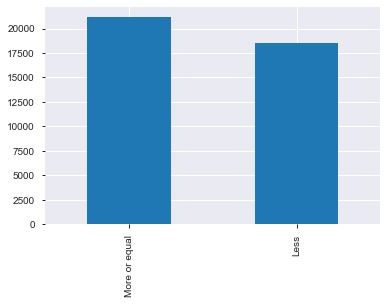

In [110]:
df['shares_new'].value_counts().plot(kind='bar')

# As we see that our data is balanced. The ratio of online news being popular v/s unpopular is almost similar.

# For feature selection using statistical techniques , as none of our variables are normally distibuted we should ideally go for non parametric test. However, as the number of columns is way too large we will go for feature importance technique.

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 0, 'Relative Importance')

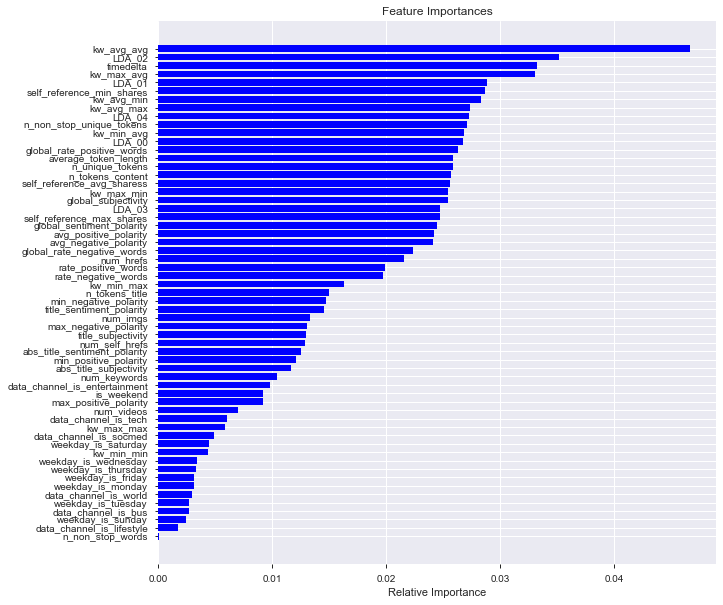

In [55]:
imp=pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index =X_train.columns)
plt.figure(figsize=(10,10))
features=imp.T.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# As observed above, the most important features effecting our target 'shares_new' is shown from most important to least important.

# Let's build our models with 15 most important features!

In [194]:
X=df.drop(['url', 'n_tokens_title', 'n_tokens_content',
       'n_non_stop_words',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'weekdays',
       'data_channel', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 
        'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 
        'LDA_03','global_subjectivity',
       'global_sentiment_polarity', 
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'shares_new'],axis=1)
y=df['shares_new']

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

# Scaling

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling train and test!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #now we want to scale the values of train data

sc.fit_transform(X_train)
pd.DataFrame(sc.fit_transform(X_train))
xtrain_scaled=pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)  #scaled data


sc.transform(X_test) 
xtest_scaled = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)


In [133]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


# Decision Tree

In [198]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
pred_dtree = dtree.fit(xtrain_scaled,y_train).predict(xtest_scaled)


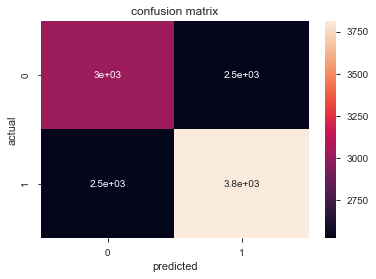

In [199]:
sns.heatmap(confusion_matrix(y_test,pred_dtree),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [200]:
accuracy_score(y_test,pred_dtree)

0.5750798722044729

In [201]:
cohen_kappa_score(y_test,pred_dtree)

0.14641318109666035

In [202]:
print("The MCC is",matthews_corrcoef(y_test,pred_dtree))


The MCC is 0.1464132145081037


In [203]:
print(classification_report(y_test,pred_dtree))

               precision    recall  f1-score   support

         Less       0.55      0.54      0.54      5555
More or equal       0.60      0.60      0.60      6339

     accuracy                           0.58     11894
    macro avg       0.57      0.57      0.57     11894
 weighted avg       0.58      0.58      0.58     11894



In [204]:
params={"criterion":['gini',"entropy"],"max_depth":[2,3,4,5],
       "max_features":["auto","sqrt","log2"],
        "splitter":["best","random"]}    #ISLR by springer

In [205]:
# Prunning Decision Tree
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)           # cv:cross validation: shows the best value 
                                                                    #which is random forest
grid.fit(xtrain_scaled,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         

In [206]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',splitter='best')

In [207]:
pred_dtree_pruned = dtree.fit(xtrain_scaled,y_train).predict(xtest_scaled)

In [208]:
accuracy_score(y_test,pred_dtree_pruned)

0.6145955944173533

In [209]:
cohen_kappa_score(y_test,pred_dtree_pruned)

0.2145657362317529

In [210]:
print("The MCC is",matthews_corrcoef(y_test,pred_dtree_pruned))


The MCC is 0.21998976382245186


# Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
pred_r = rf.fit(xtrain_scaled,y_train).predict(xtest_scaled)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


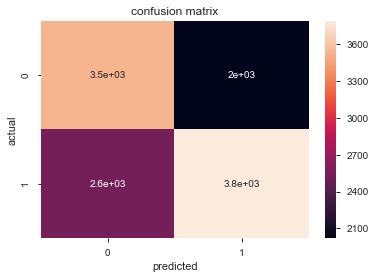

In [212]:
sns.heatmap(confusion_matrix(y_test,pred_r),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [213]:
print("The MCC is",matthews_corrcoef(y_test,pred_r))
print("The accuracy is",accuracy_score(y_test,pred_r))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_r))

The MCC is 0.23348925825310193
The accuracy is 0.6156885824785606
The cohen kuppa score is 0.23255952485308484


# KNN Model

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
pred_knn = knn.fit(xtrain_scaled,y_train).predict(xtest_scaled)

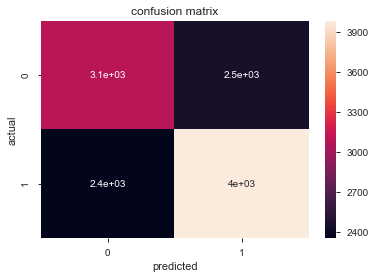

In [215]:
sns.heatmap(confusion_matrix(y_test,pred_knn),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [216]:
print("The MCC is",matthews_corrcoef(y_test,pred_knn))
print("The accuracy is",accuracy_score(y_test,pred_knn))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_knn))

The MCC is 0.1862137718021794
The accuracy is 0.5953421893391626
The cohen kuppa score is 0.1861832924044875


# Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
pred_lr=lg.fit(xtrain_scaled,y_train).predict(xtest_scaled)


C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


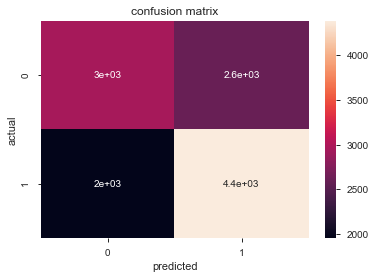

In [218]:
sns.heatmap(confusion_matrix(y_test,pred_lr),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [219]:
print("The MCC is",matthews_corrcoef(y_test,pred_lr))
print("The accuracy is",accuracy_score(y_test,pred_lr))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_lr))

The MCC is 0.2275385905220346
The accuracy is 0.6175382545821423
The cohen kuppa score is 0.22614758651034794


# Naive Bayes

In [220]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
pred_gnb=gnb.fit(xtrain_scaled,y_train).predict(xtest_scaled) 
  


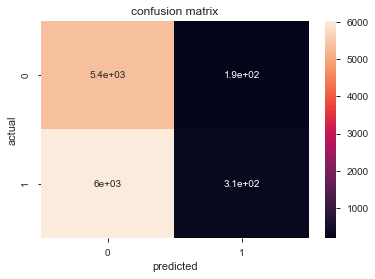

In [221]:
sns.heatmap(confusion_matrix(y_test,pred_gnb),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [222]:
print("The MCC is",matthews_corrcoef(y_test,pred_gnb))
print("The accuracy is",accuracy_score(y_test,pred_gnb))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_gnb))

The MCC is 0.03665381384181535
The accuracy is 0.47721540272406254
The cohen kuppa score is 0.013910026255149033


# Let's build our models with 20 most important features

In [223]:
X=df.drop(['url', 'n_tokens_title', 
       'n_non_stop_words',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'weekdays',
       'data_channel', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 
       'kw_min_max', 'kw_max_max', 
        'self_reference_max_shares',
      'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 
        
       'global_sentiment_polarity', 
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'shares_new'],axis=1)
y=df['shares_new']

In [226]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=123)

# Scaling

In [227]:
#scaling train and test!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #now we want to scale the values of train data

sc.fit_transform(xtrain)
pd.DataFrame(sc.fit_transform(xtrain))
xtrain_scaled=pd.DataFrame(sc.fit_transform(xtrain),columns = xtrain.columns)  #scaled data


sc.transform(xtest) 
xtest_scaled = pd.DataFrame(sc.transform(xtest),columns = xtest.columns)


# Decision Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
pred_dtree = dtree.fit(xtrain_scaled,ytrain).predict(xtest_scaled)


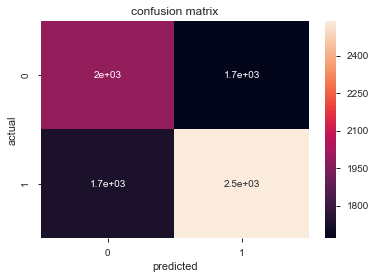

In [229]:
sns.heatmap(confusion_matrix(ytest,pred_dtree),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [231]:
print("The MCC is",matthews_corrcoef(ytest,pred_dtree))
print("The accuracy is",accuracy_score(ytest,pred_dtree))
print("The cohen kuppa score is",cohen_kappa_score(ytest,pred_dtree))

The MCC is 0.13832743018382015
The accuracy is 0.5711943498549628
The cohen kuppa score is 0.1383103523643453


In [232]:
params={"criterion":['gini',"entropy"],"max_depth":[2,3,4,5],
       "max_features":["auto","sqrt","log2"],
        "splitter":["best","random"]}    #ISLR by springer

In [233]:
# Prunning Decision Tree
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)           # cv:cross validation: shows the best value 
                                                                    #which is random forest
grid.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         

In [234]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',splitter='best')

In [235]:
pred_dtree_pruned = dtree.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [236]:
print("The MCC is",matthews_corrcoef(ytest,pred_dtree_pruned))
print("The accuracy is",accuracy_score(ytest,pred_dtree_pruned))
print("The cohen kuppa score is",cohen_kappa_score(ytest,pred_dtree_pruned))

The MCC is 0.21159006423279683
The accuracy is 0.6078950687350233
The cohen kuppa score is 0.21158352592578955


# Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
pred_r = rf.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


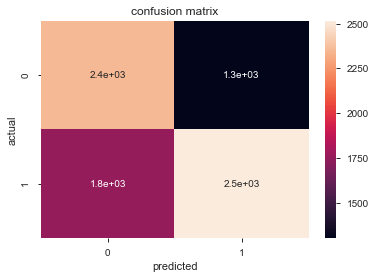

In [238]:
sns.heatmap(confusion_matrix(ytest,pred_r),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [239]:
print("The MCC is",matthews_corrcoef(ytest,pred_r))
print("The accuracy is",accuracy_score(ytest,pred_r))
print("The cohen kuppa score is",cohen_kappa_score(ytest,pred_r))

The MCC is 0.23285729686239148
The accuracy is 0.6145793921049313
The cohen kuppa score is 0.23134756366190723


# KNN Model

In [240]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
pred_knn = knn.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

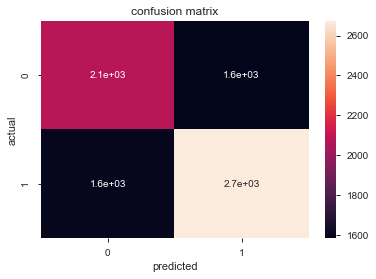

In [241]:
sns.heatmap(confusion_matrix(ytest,pred_knn),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [242]:
print("The MCC is",matthews_corrcoef(ytest,pred_knn))
print("The accuracy is",accuracy_score(ytest,pred_knn))
print("The cohen kuppa score is",cohen_kappa_score(ytest,pred_knn))

The MCC is 0.1938191055804722
The accuracy is 0.5991928364232564
The cohen kuppa score is 0.19381788326709526


# Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
pred_lr=lg.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_lr) 

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6314793794930004

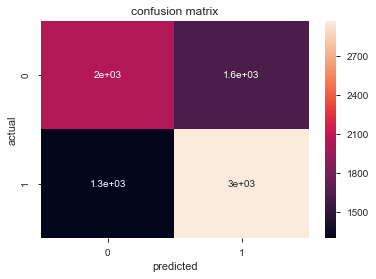

In [244]:
sns.heatmap(confusion_matrix(ytest,pred_lr),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [245]:
print("The MCC is",matthews_corrcoef(ytest,pred_lr))
print("The accuracy is",accuracy_score(ytest,pred_lr))
print("The cohen kuppa score is",cohen_kappa_score(ytest,pred_lr))

The MCC is 0.2546466959315561
The accuracy is 0.6314793794930004
The cohen kuppa score is 0.2537406957302062


# Naive Bayes

In [246]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
pred_gnb=gnb.fit(xtrain_scaled,ytrain).predict(xtest_scaled) 
  


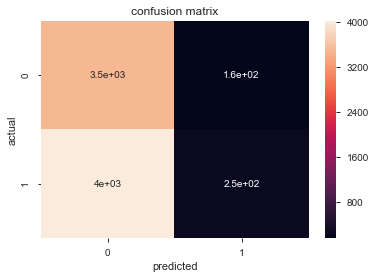

In [247]:
sns.heatmap(confusion_matrix(ytest,pred_gnb),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [248]:
print("The MCC is",matthews_corrcoef(ytest,pred_gnb))
print("The accuracy is",accuracy_score(ytest,pred_gnb))
print("The cohen kuppa score is",cohen_kappa_score(ytest,pred_gnb))

The MCC is 0.035162287947538
The accuracy is 0.4731996468659352
The cohen kuppa score is 0.014505876778810989


# Let's build our models with 25 most important features!¶

In [167]:
X=df.drop(['url', 'n_tokens_title', 
       'n_non_stop_words',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'weekdays',
       'data_channel', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 
       'kw_min_max', 'kw_max_max', 
       
       'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 
      
        'rate_positive_words',
       'rate_negative_words',  'min_positive_polarity',
       'max_positive_polarity', 
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'shares_new'],axis=1)
y=df['shares_new']

In [168]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=27)

# Scaling

In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling train and test!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #now we want to scale the values of train data

sc.fit_transform(xtrain)
pd.DataFrame(sc.fit_transform(xtrain))
xtrain_scaled=pd.DataFrame(sc.fit_transform(xtrain),columns = xtrain.columns)  #scaled data


sc.transform(xtest) 
xtest_scaled = pd.DataFrame(sc.transform(xtest),columns = xtest.columns)


# Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
pred_dtree = dtree.fit(xtrain_scaled,ytrain).predict(xtest_scaled)


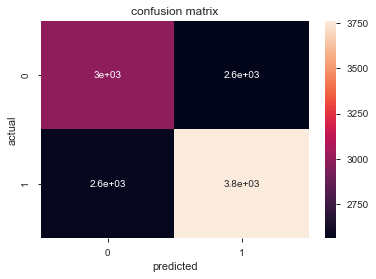

In [171]:
sns.heatmap(confusion_matrix(ytest,pred_dtree),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [172]:
print("The MCC is",matthews_corrcoef(y_test,pred_dtree))
print("The accuracy is",accuracy_score(y_test,pred_dtree))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_dtree))

The MCC is 0.13309522152270184
The accuracy is 0.5683537918278123
The cohen kuppa score is 0.1330947357816855


In [173]:
print(classification_report(ytest,pred_dtree))

               precision    recall  f1-score   support

         Less       0.54      0.54      0.54      5555
More or equal       0.60      0.59      0.59      6339

     accuracy                           0.57     11894
    macro avg       0.57      0.57      0.57     11894
 weighted avg       0.57      0.57      0.57     11894



In [174]:
params={"criterion":['gini',"entropy"],"max_depth":[2,3,4,5],
       "max_features":["auto","sqrt","log2"],
        "splitter":["best","random"]}    #ISLR by springer

In [175]:
# Prunning Decision Tree
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)           # cv:cross validation: shows the best value 
                                                                    #which is random forest
grid.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         

In [176]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',splitter='best')

In [177]:
pred_dtree_pruned = dtree.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [178]:
print("The MCC is",matthews_corrcoef(y_test,pred_dtree_pruned))
print("The accuracy is",accuracy_score(y_test,pred_dtree_pruned))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_dtree_pruned))

The MCC is 0.23937305017087698
The accuracy is 0.623675802925845
The cohen kuppa score is 0.2368459296595794


# Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
pred_r = rf.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


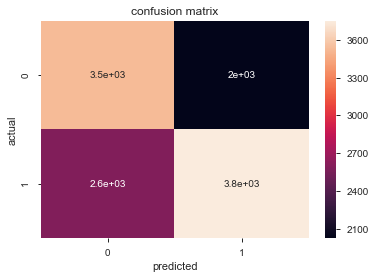

In [180]:
sns.heatmap(confusion_matrix(ytest,pred_r),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [181]:
print("The MCC is",matthews_corrcoef(y_test,pred_r))
print("The accuracy is",accuracy_score(y_test,pred_r))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_r))

The MCC is 0.2267969266769727
The accuracy is 0.6121573902808138
The cohen kuppa score is 0.22578218376043402


# KNN Model

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
pred_knn = knn.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

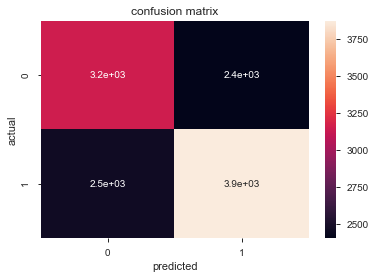

In [183]:
sns.heatmap(confusion_matrix(ytest,pred_knn),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [184]:
print("The MCC is",matthews_corrcoef(y_test,pred_knn))
print("The accuracy is",accuracy_score(y_test,pred_knn))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_knn))

The MCC is 0.17794388799507707
The accuracy is 0.5904657810660837
The cohen kuppa score is 0.17793382971448224


# Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
pred_lr=lg.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_lr) 

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6234235749117202

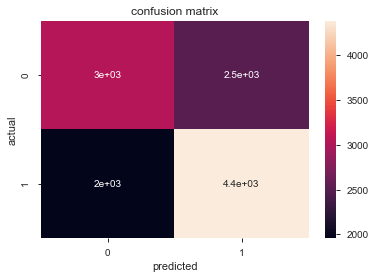

In [186]:
sns.heatmap(confusion_matrix(ytest,pred_lr),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [187]:
print("The MCC is",matthews_corrcoef(y_test,pred_lr))
print("The accuracy is",accuracy_score(y_test,pred_lr))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_lr))

The MCC is 0.23989032573680916
The accuracy is 0.6234235749117202
The cohen kuppa score is 0.2387896885982459


# Naive Bayes

In [188]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
pred_gnb=gnb.fit(xtrain_scaled,ytrain).predict(xtest_scaled) 
  


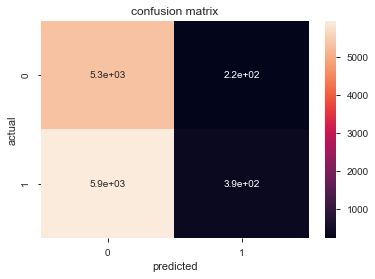

In [189]:
sns.heatmap(confusion_matrix(ytest,pred_gnb),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [190]:
print("The MCC is",matthews_corrcoef(y_test,pred_gnb))
print("The accuracy is",accuracy_score(y_test,pred_gnb))
print("The cohen kuppa score is",cohen_kappa_score(y_test,pred_gnb))

The MCC is 0.04957871860144015
The accuracy is 0.4813351269547671
The cohen kuppa score is 0.020605776788023777


# Building Final models with target or shares being divided into three categories!

In [74]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [82]:
shares_three=[]
shareslist=list(df['shares'])
for i in shareslist:
    if i in range(1,1400):
        shares_three.append('Least_Popular')
    elif i in range(1401,2800):
        shares_three.append('Avg_Popular')
    else:shares_three.append('Most_Popular')
        

In [83]:
df['shares_three']=pd.Series(shares_three)

In [84]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_new,shares_three
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular,Least_Popular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular,Least_Popular
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular,Avg_Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular,Least_Popular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular,Least_Popular


In [85]:
df.shares_three.value_counts()

Least_Popular    18490
Most_Popular     11581
Avg_Popular       9573
Name: shares_three, dtype: int64

In [97]:
X=df.drop(['url','shares_new','shares_three'],axis=1)
y=df['shares_three']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)


### Scaling

In [123]:
#scaling train and test!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #now we want to scale the values of train data

sc.fit_transform(x_train)
pd.DataFrame(sc.fit_transform(x_train))
xtrain_scaled=pd.DataFrame(sc.fit_transform(x_train),columns = x_train.columns)  #scaled data


sc.transform(x_test) 
xtest_scaled = pd.DataFrame(sc.transform(x_test),columns = x_test.columns)


## Logistic regression 

In [109]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [124]:
model_lg=lg.fit(xtrain_scaled,y_train).predict(xtest_scaled)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [125]:
accuracy_score(y_test,model_lg)

0.8362199428283168

In [137]:
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model_lg)) 

print("The MCC is",matthews_corrcoef(y_test,model_lg))


cohen_kappa_score is  0.7351340391171024
The MCC is 0.7495544268193741


## Decision tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [126]:
model_dc=dc.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,model_dc)

1.0

In [138]:
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model_dc)) 

print("The MCC is",matthews_corrcoef(y_test,model_dc))

cohen_kappa_score is  1.0
The MCC is 1.0


## Random Forest 

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()


In [127]:
model1=rfc.fit(xtrain_scaled,y_train).predict(xtest_scaled)

In [128]:
accuracy_score(y_test,model1)

0.9706574743568186

In [140]:
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model1)) 

print("The MCC is",matthews_corrcoef(y_test,model1))

cohen_kappa_score is  0.9541014466692255
The MCC is 0.9543045476524376


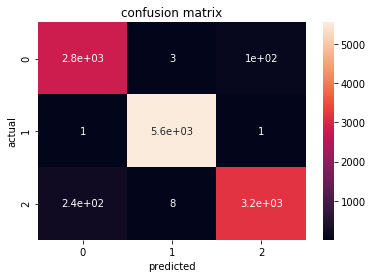

In [150]:
sns.heatmap(confusion_matrix(y_test,model1),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [151]:
print(classification_report(y_test,model1))

               precision    recall  f1-score   support

  Avg_Popular       0.92      0.96      0.94      2917
Least_Popular       1.00      1.00      1.00      5555
 Most_Popular       0.97      0.93      0.95      3422

     accuracy                           0.97     11894
    macro avg       0.96      0.96      0.96     11894
 weighted avg       0.97      0.97      0.97     11894



## KNN model

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [131]:
model_knn=knn.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,model_knn)

0.4811669749453506

In [141]:
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model_knn)) 

print("The MCC is",matthews_corrcoef(y_test,model_knn))

cohen_kappa_score is  0.15813493914148657
The MCC is 0.1626814715434148


## Naive Bayes 


In [132]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
model_nb=gnb.fit(xtrain_scaled,y_train).predict(xtest_scaled) 
accuracy_score(y_test,model_nb)

0.76904321506642

In [142]:
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model_nb)) 

print("The MCC is",matthews_corrcoef(y_test,model_nb))

cohen_kappa_score is  0.6409436738116485
The MCC is 0.6504680641610701


# Ensemble Technique
## Gradient boosting 

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain_scaled,y_train).predict(xtest_scaled) 
accuracy_score(y_test,model_gb)

1.0

In [143]:
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model_gb)) 

print("The MCC is",matthews_corrcoef(y_test,model_gb))

cohen_kappa_score is  1.0
The MCC is 1.0


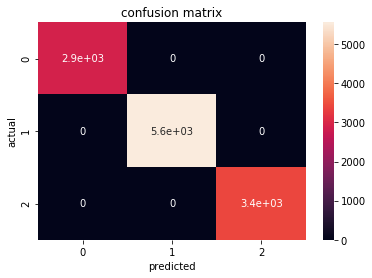

In [146]:
sns.heatmap(confusion_matrix(y_test,model_gb),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_gb))

               precision    recall  f1-score   support

  Avg_Popular       1.00      1.00      1.00      2917
Least_Popular       1.00      1.00      1.00      5555
 Most_Popular       1.00      1.00      1.00      3422

     accuracy                           1.00     11894
    macro avg       1.00      1.00      1.00     11894
 weighted avg       1.00      1.00      1.00     11894



## Ada boost 


In [134]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
model_ad=ad.fit(xtrain_scaled,y_train).predict(xtest_scaled) 
accuracy_score(y_test,model_ad)

1.0

In [144]:
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model_ad)) 

print("The MCC is",matthews_corrcoef(y_test,model_ad))

cohen_kappa_score is  1.0
The MCC is 1.0


## Bagging 

In [135]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier()
model_bg=bg.fit(xtrain_scaled,y_train).predict(xtest_scaled) 
accuracy_score(y_test,model_bg)

1.0

In [145]:
print("cohen_kappa_score is ",cohen_kappa_score(y_test,model_bg)) 

print("The MCC is",matthews_corrcoef(y_test,model_bg))

cohen_kappa_score is  1.0
The MCC is 1.0


## Inference
By seeing above methods we can say that models are performing very well when taking three categories in  target.Out of all techniques Ensemble is performing the best accuracy around 1.KNN and Naive bayes are not building good models or giving good accuracy.

# Let's build our final models by taking two categories of target shares -  Popular and unpopular .
There was little scope for extracting features as most features are already exytracted and our data is dummified.

In [ ]:
X=df.drop(['url','shares_new','shares','weekdays','data_channel'],axis=1)
y=df['shares_new']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

# Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
#scaling train and test!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #now we want to scale the values of train data

sc.fit_transform(X_train)
pd.DataFrame(sc.fit_transform(X_train))
xtrain_scaled=pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)  #scaled data


sc.transform(X_test) 
xtest_scaled = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)


In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
pred_dtree = dtree.fit(xtrain_scaled,y_train).predict(xtest_scaled)


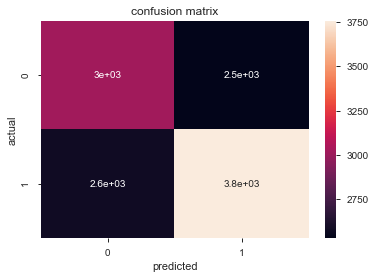

In [63]:
sns.heatmap(confusion_matrix(y_test,pred_dtree),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [64]:
accuracy_score(y_test,pred_dtree)

0.5701193879266857

In [65]:
cohen_kappa_score(y_test,pred_dtree)

0.13697690330554446

In [66]:
print("The MCC is",matthews_corrcoef(y_test,pred_dtree))


The MCC is 0.13698197876180876


In [67]:
print(classification_report(y_test,pred_dtree))

               precision    recall  f1-score   support

         Less       0.54      0.54      0.54      5555
More or equal       0.60      0.59      0.60      6339

     accuracy                           0.57     11894
    macro avg       0.57      0.57      0.57     11894
 weighted avg       0.57      0.57      0.57     11894



In [ ]:
#pruning decision tree-grid search cv

In [68]:
params={"criterion":['gini',"entropy"],"max_depth":[2,3,4,5],
       "max_features":["auto","sqrt","log2"],
        "splitter":["best","random"]}    #ISLR by springer

In [69]:
# Prunning Decision Tree
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)           # cv:cross validation: shows the best value 
                                                                    #which is random forest
grid.fit(xtrain_scaled,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         

In [70]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',splitter='best')

In [71]:
pred_dtree_pruned = dtree.fit(xtrain_scaled,y_train).predict(xtest_scaled)

In [73]:
accuracy_score(y_test,pred_dtree_pruned)

0.637464267697999

In [74]:
cohen_kappa_score(y_test,pred_dtree_pruned)

0.26138780252258453

In [75]:
print("The MCC is",matthews_corrcoef(y_test,pred_dtree_pruned))


The MCC is 0.26771784161048146


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [77]:
pred_r = rf.fit(xtrain_scaled,y_train).predict(xtest_scaled)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


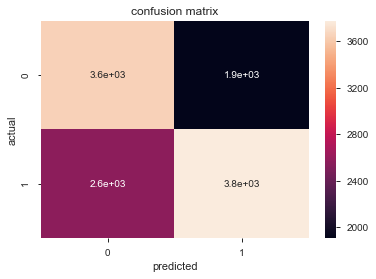

In [79]:
sns.heatmap(confusion_matrix(y_test,pred_r),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [80]:
accuracy_score(y_test,pred_r)

0.6241802589540945

In [81]:
cohen_kappa_score(y_test,pred_r)

0.2505700629760903

In [82]:
print("The MCC is",matthews_corrcoef(y_test,pred_r))


The MCC is 0.2521088707984484


# KNN Model

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [86]:
pred_knn = knn.fit(xtrain_scaled,y_train).predict(xtest_scaled)

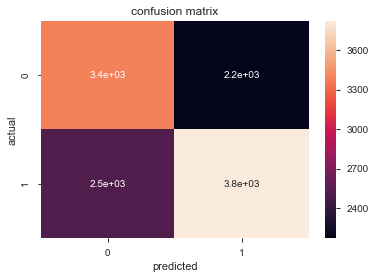

In [87]:
sns.heatmap(confusion_matrix(y_test,pred_knn),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [88]:
accuracy_score(y_test,pred_knn)

0.6060198419371111

In [89]:
cohen_kappa_score(y_test,pred_knn)

0.2116377321908478

In [90]:
print("The MCC is",matthews_corrcoef(y_test,pred_knn))


The MCC is 0.2119972064479846


In [91]:
#increasing the number of neighbours of knn!!
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=20) #increasing the number of neighbors, say , 20 ........
pred_knn_neighbours=knn.fit(xtrain_scaled,y_train).predict(xtest_scaled)

In [92]:
accuracy_score(y_test,pred_knn_neighbours)

0.6270388431141752

In [94]:
cohen_kappa_score(y_test,pred_knn_neighbours)

0.2579106288499683

In [95]:
print("The MCC is",matthews_corrcoef(y_test,pred_knn_neighbours))


The MCC is 0.2606091000733911


# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
pred_lr=lg.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,pred_lr) #accuracy is 69%

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6520934925172356

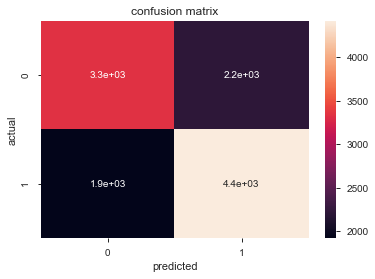

In [98]:
sns.heatmap(confusion_matrix(y_test,pred_lr),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [100]:
cohen_kappa_score(y_test,pred_lr)

0.2988558260342493

In [101]:
print("The MCC is",matthews_corrcoef(y_test,pred_lr))


The MCC is 0.29922733500221504


# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
pred_gnb=gnb.fit(xtrain_scaled,y_train).predict(xtest_scaled) 
  


In [103]:
accuracy_score(y_test,pred_gnb)

0.5063897763578274

In [104]:
print("The MCC is",matthews_corrcoef(y_test,pred_gnb))


The MCC is 0.11623005882770394


In [105]:
cohen_kappa_score(y_test,pred_gnb)

0.06328966639354416

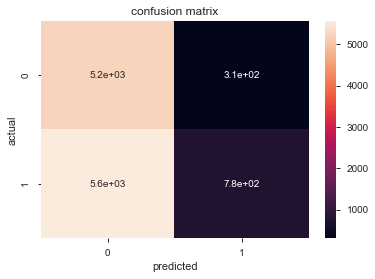

In [106]:
sns.heatmap(confusion_matrix(y_test,pred_gnb),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

# Ensemble Techniques:

# Decision Tree - using entropy

In [111]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')  #criterion defined as entropy
pred_dtree_class=dtree.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,pred_dtree_class)
#much higher accuracy than simple decision tree

0.5818059525811333

In [112]:
cohen_kappa_score(y_test,pred_dtree_class)   

0.15996205394320795

In [113]:
print("The MCC is",matthews_corrcoef(y_test,pred_dtree_class))


The MCC is 0.15996205394320787


# Bagging

In [114]:
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier()
pred_bagg=bagg.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,pred_bagg)

0.624684714982344

In [115]:
cohen_kappa_score(y_test,pred_bagg)   

0.25164217155237

In [116]:
print("The MCC is",matthews_corrcoef(y_test,pred_bagg))


The MCC is 0.25322544478414877


# Boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()  #needs tuning!
pred_gbm=gbm.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,pred_gbm)  #high accuracy

0.6747099377837565

In [118]:
cohen_kappa_score(y_test,pred_gbm)   

0.3434159616149216

In [119]:
print("The MCC is",matthews_corrcoef(y_test,pred_gbm))


The MCC is 0.34434688207477765


# Adaboost

In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
pred_ada=ada.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,pred_ada)  

0.6692449974777198

In [121]:
cohen_kappa_score(y_test,pred_ada)   

0.3336895647298336

In [122]:
print("The MCC is",matthews_corrcoef(y_test,pred_ada))


The MCC is 0.33400861496971995


# Voting Classifier

In [123]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("tree",dtree),("random",rf),("gbm",gbm),("knn",knn),("logistic",lg),("bagging",bagg),("adaboost",ada)])  # we can take as many estimators
pred_vc=vc.fit(xtrain_scaled,y_train).predict(xtest_scaled)
accuracy_score(y_test,pred_vc)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6696653775012611

In [124]:
cohen_kappa_score(y_test,pred_vc)   

0.33632211069319884

In [125]:
print("The MCC is",matthews_corrcoef(y_test,pred_vc))


The MCC is 0.33632349737429046


Conclusion and Business Insights
In this project, we analysed a dataset to predict the popularity of a news article. Based on the correlation coefficient matrix, following are some recommendations to improve the popularity of our the article :-


Increase the:
number of embedded links
number of images
number of videos
amount of subjectivity in title
amount of subjectivity in content
number of words which are more popular
references to older articles which have high popularity
Decrease the:
number of longer words in the content
amount of multi-topic discussion in an article (Articles which talk about multiple topics perform poorly)
number of negative words (words with negative polarity)


Some other observations — Articles with positive words in the title tend to be more popular while articles in the ‘world’ channel/category tend to be less popular.


